# Math 189 Final Project (Code)

**Note**: Code, material, and explanations were retrieved from a mixture of lecture, homework, and ChatGPT.

## Problem

The rapid advancement of artificial intelligence, or AI, has significantly transformed the global workforce. While AI has the potential to enhance efficiency and boost economic productivity, it also raises concerns about job displacement and wage fluctuations across various industries. With finance, healthcare, manufacturing, and technology sectors already experiencing notable changes, how might AI continue to influence job market trends, employment rates, changing skill requirements, salary fluctuations, and projections for job availability?

## Background

Understanding the effects of artificial intelligence (AI) is essential for educators, businesses, and policymakers as they adapt to an increasingly technology-driven world. AI is not only transforming individual tasks but also reshaping entire industries, influencing how work is performed, and redefining the skills required for future employment. To respond effectively, stakeholders must develop strategies that ensure fair wages, update skill development programs, and support sustainable economic growth. This includes creating accessible training opportunities that equip workers with AI-related skills, helping to bridge the gap between technological advancements and workforce readiness.
As AI continues to impact the job market, proactive measures are necessary to mitigate job displacement while fostering innovation and creating new career paths. Rather than reacting to workforce changes as they occur, policymakers and businesses can anticipate these shifts by investing in reskilling initiatives, supporting entrepreneurship, and encouraging collaboration between industries. Analyzing AI trends provides valuable insights into the evolving employment landscape, allowing stakeholders to prepare for the long-term implications of AI integration. Ultimately, a well-informed approach will help build a more adaptable economy, balancing technological progress with inclusive growth and human-centered development.


## What We're Investigating w/ Each Dataset

- **AI-powered Job Market Insights**: provides AI adoption levels across jobs, automation risk ratings for different job types, job growth projections, required skills, and salary data. We will analyze this dataset to examine how AI adoption and automation risk may correlate with employment changes, how AI adoption could possibly foster job growth projection, compare wages in AI-intensive and non-AI job sectors, evaluate if job postings fluctuate across industries (AI-heavy vs traditional industries), how salary might fluctuate between AI-heavy and non-AI-heavy/traditional jobs, and what aspects about the workforce might lead to higher or lower automation risk.


- **AI Job Threat Index**: provides AI impact scores, AI workload ratios, task composition, and industry-specific AI adoption trends across various job titles. We will analyze this dataset to examine how AI workload ratio relates in any way with AI impact of a job, evaluate whether jobs with more tasks tend to have significantly different AI impact scores than jobs with fewer tasks, view whether very distinct job domains have significantly different AI impact distributions, and identify what covariates have the most predictive power in assessing AI Impact and to what extent.

## Datasets

### Dataset 1: AI Powered Job Market

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import scipy.stats as stats
import sklearn
from scipy.stats import pearsonr
from scipy.stats import ks_2samp
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
AI_Powered_Job_Market = pd.read_csv('ai_job_market_insights.csv')
AI_Powered_Job_Market.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [22]:
AI_Powered_Job_Market.groupby('Industry').mean()

,Salary_USD
Industry,
Education,93798.521907
Energy,92763.939416
Entertainment,94291.233910
Finance,94355.465599
Healthcare,91688.504404
Manufacturing,86590.003715
Retail,91232.897408
Technology,91204.011373
Telecommunications,90418.304458


### Dataset 2: AI Job Threat Index

In [3]:
AI_Job_Threat_Index = pd.read_csv('ai_job_threat_index.csv')
AI_Job_Threat_Index.head()

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare


-----

## Dataset 1: AI Powered Job Market

### Data Cleaning and Exploratory Data Analysis (EDA): AI Powered Job Market

In [24]:
AI_Powered_Job_Market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Job_Title              500 non-null    object  
 1   Industry               500 non-null    object  
 2   Company_Size           500 non-null    object  
 3   Location               500 non-null    object  
 4   AI_Adoption_Level      500 non-null    category
 5   Automation_Risk        500 non-null    category
 6   Required_Skills        500 non-null    object  
 7   Salary_USD             500 non-null    float64 
 8   Remote_Friendly        500 non-null    object  
 9   Job_Growth_Projection  500 non-null    category
dtypes: category(3), float64(1), object(6)
memory usage: 29.3+ KB


In [25]:
print("\nSummary statistics:")
print(AI_Powered_Job_Market.describe())


Summary statistics:
          Salary_USD
count     500.000000
mean    91222.390974
std     20504.291453
min     31969.526346
25%     78511.514863
50%     91998.195286
75%    103971.282092
max    155209.821614


#### AI Adoption Levels Across Industries

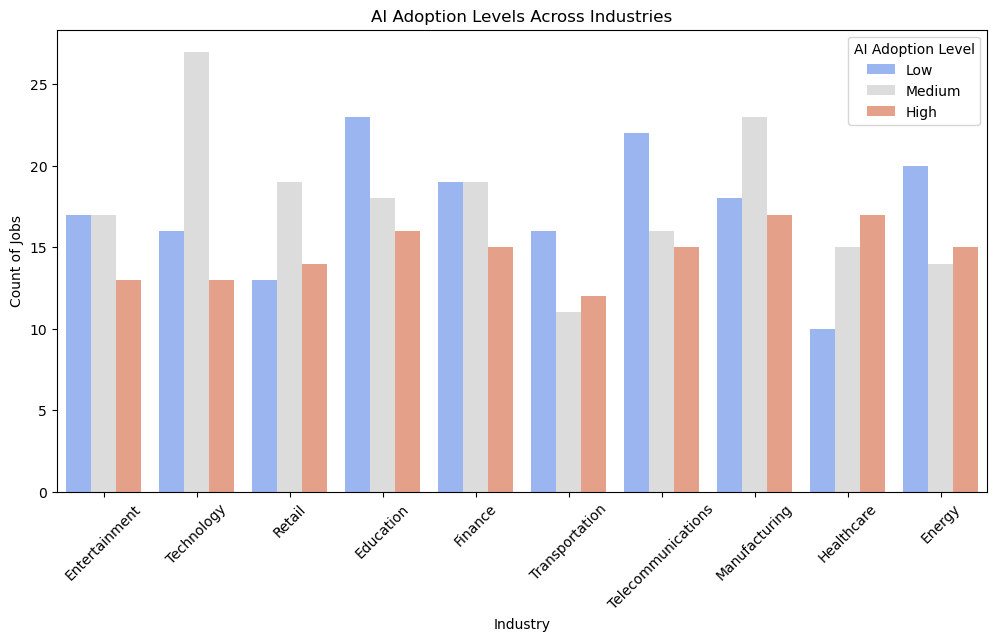

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(data=AI_Powered_Job_Market, x="Industry", hue="AI_Adoption_Level", palette="coolwarm")
plt.title("AI Adoption Levels Across Industries")
plt.xticks(rotation=45)
plt.xlabel("Industry")
plt.ylabel("Count of Jobs")
plt.legend(title="AI Adoption Level")
plt.show()

#### Salary (USD) Distribution

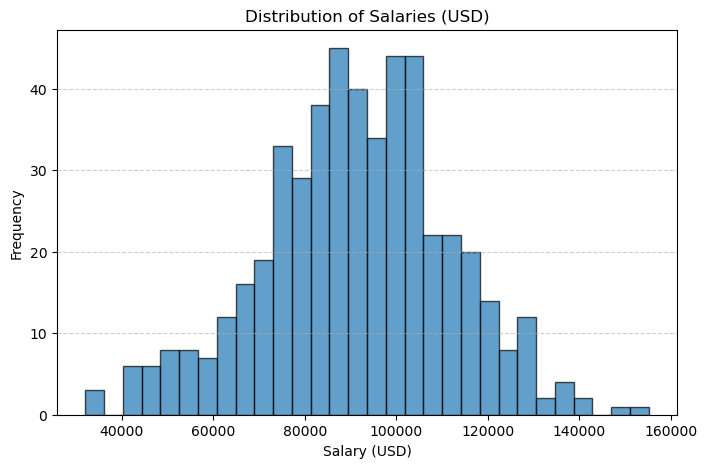

In [27]:
plt.figure(figsize=(8, 5))
plt.hist(AI_Powered_Job_Market["Salary_USD"], bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.title("Distribution of Salaries (USD)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

#### Salary Distribution by AI Adoption Level

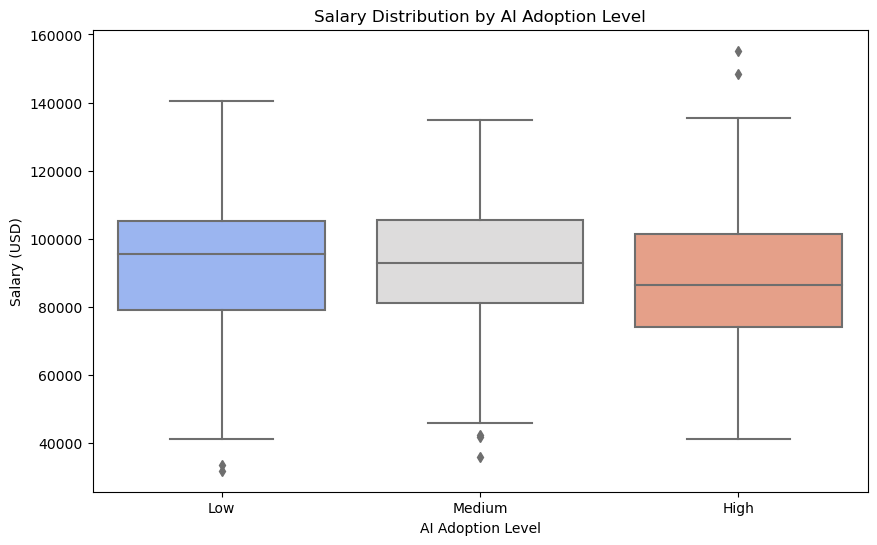

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=AI_Powered_Job_Market, x="AI_Adoption_Level", y="Salary_USD", palette="coolwarm")
plt.title("Salary Distribution by AI Adoption Level")
plt.xlabel("AI Adoption Level")
plt.ylabel("Salary (USD)")
plt.show()

#### Salary Comparison by Automation Risk Level

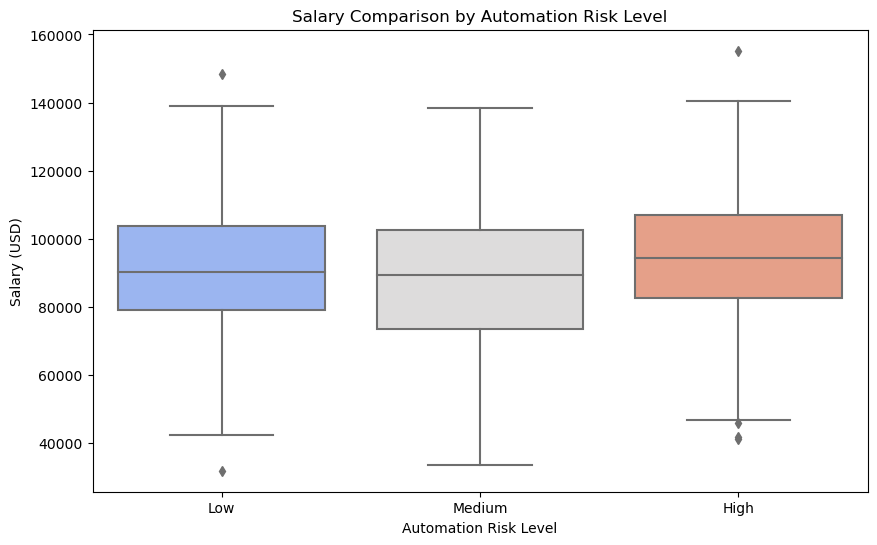

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=AI_Powered_Job_Market, x="Automation_Risk", y="Salary_USD", palette="coolwarm")
plt.title("Salary Comparison by Automation Risk Level")
plt.xlabel("Automation Risk Level")
plt.ylabel("Salary (USD)")
plt.show()

#### Average salary of each job

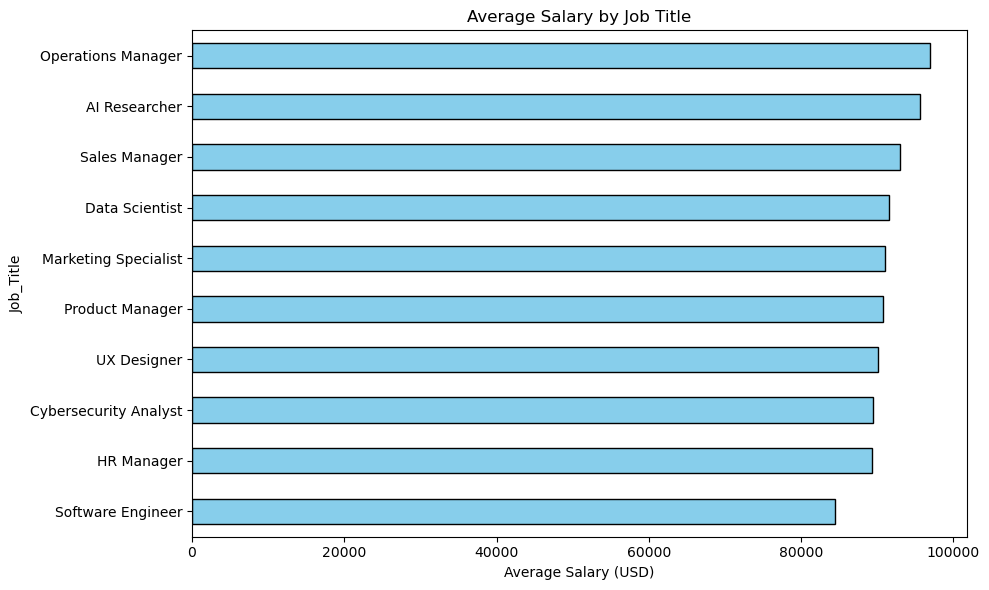

In [30]:
mean_salary = AI_Powered_Job_Market.groupby('Job_Title')['Salary_USD'].mean().sort_values()

plt.figure(figsize=(10, 6))
mean_salary.plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Average Salary (USD)')
plt.title('Average Salary by Job Title')
plt.tight_layout()
plt.show()

#### Job Growth Projection Across Industries

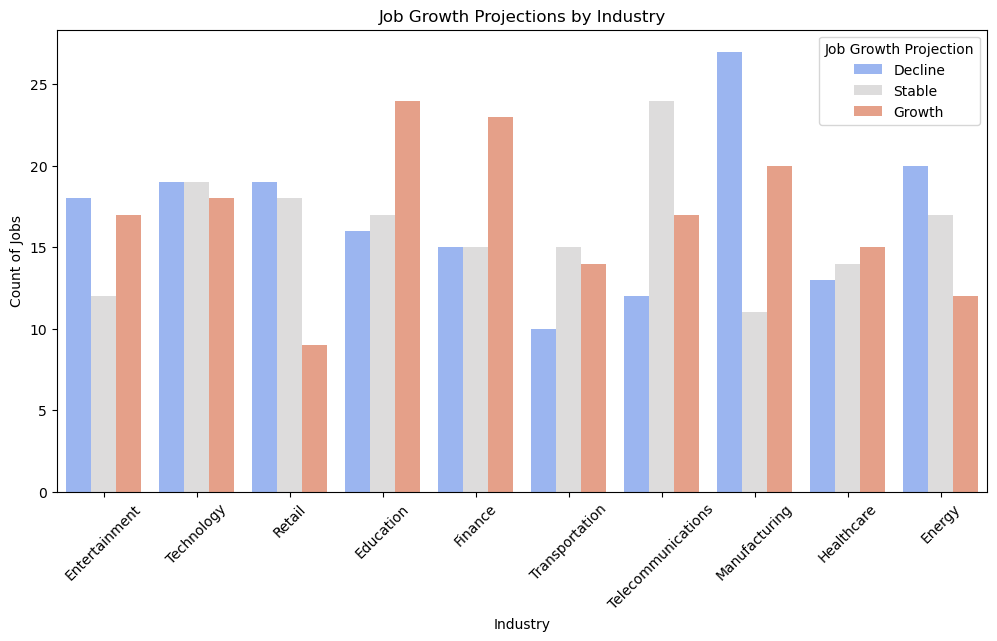

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(data=AI_Powered_Job_Market, x="Industry", hue="Job_Growth_Projection", palette="coolwarm")
plt.title("Job Growth Projections by Industry")
plt.xticks(rotation=45)
plt.xlabel("Industry")
plt.ylabel("Count of Jobs")
plt.legend(title="Job Growth Projection")
plt.show()

#### Relationship Between AI Adoption and Job Growth Projection

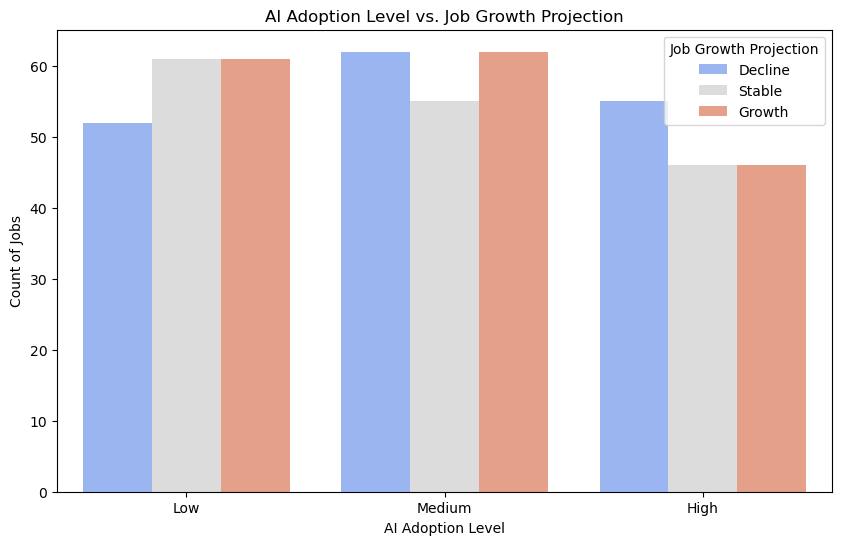

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(data=AI_Powered_Job_Market, x="AI_Adoption_Level", hue="Job_Growth_Projection", palette="coolwarm")
plt.title("AI Adoption Level vs. Job Growth Projection")
plt.xlabel("AI Adoption Level")
plt.ylabel("Count of Jobs")
plt.legend(title="Job Growth Projection")
plt.show()


#### Distribution of Remote-Friendly Jobs

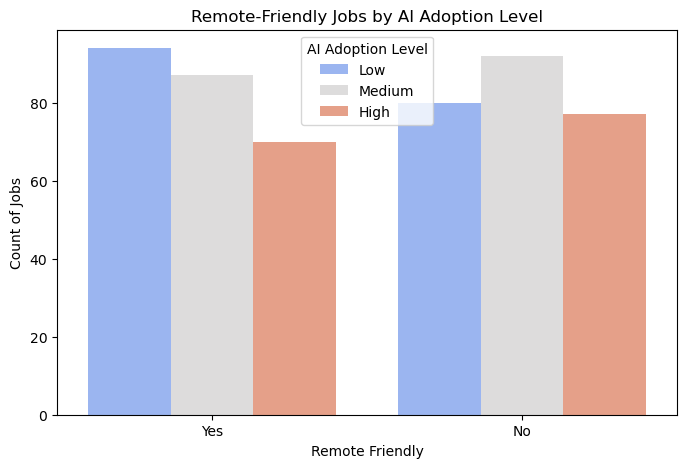

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(data=AI_Powered_Job_Market, x="Remote_Friendly", hue="AI_Adoption_Level", palette="coolwarm")
plt.title("Remote-Friendly Jobs by AI Adoption Level")
plt.xlabel("Remote Friendly")
plt.ylabel("Count of Jobs")
plt.legend(title="AI Adoption Level")
plt.show()

#### Most In-Demand Skills in an AI-Driven Job Market

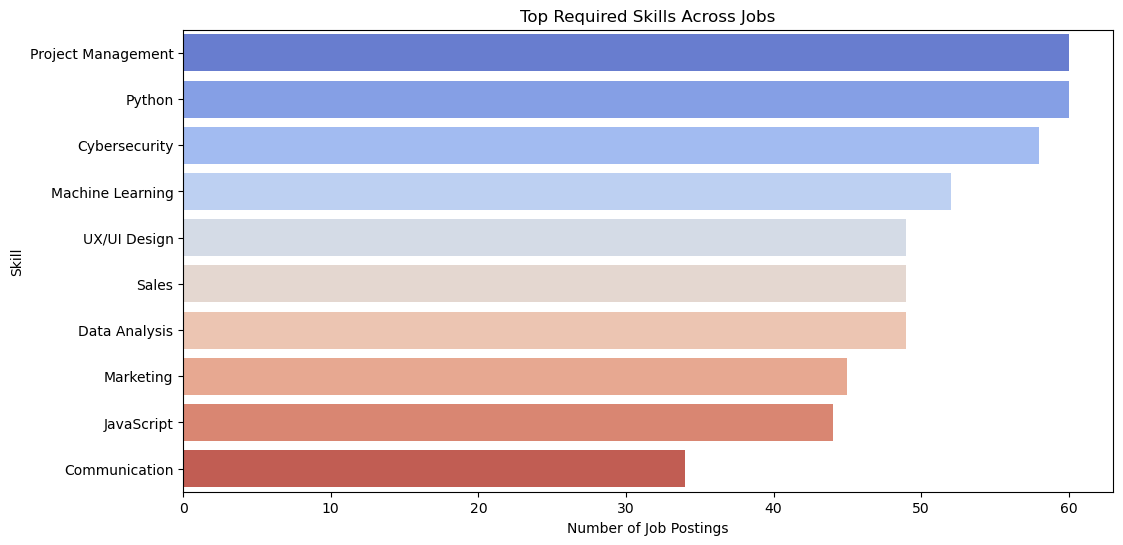

In [34]:
top_skills = AI_Powered_Job_Market["Required_Skills"].value_counts().nlargest(15)  # Get top 15 skills
plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills.values, y=top_skills.index, palette="coolwarm")
plt.title("Top Required Skills Across Jobs")
plt.xlabel("Number of Job Postings")
plt.ylabel("Skill")
plt.show()

#### Average Salary by Industry and AI Adoption Level

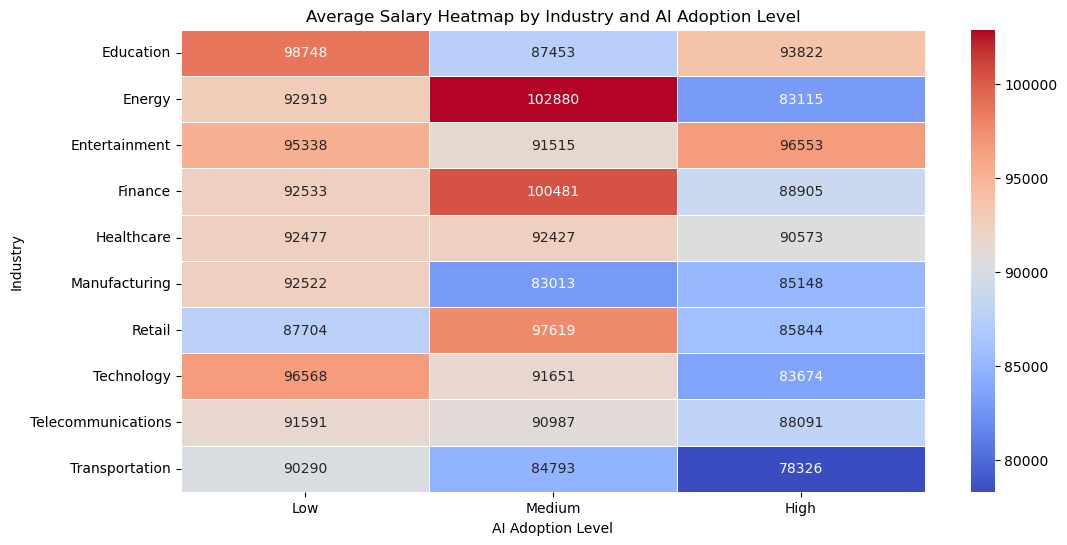

In [35]:
salary_pivot = AI_Powered_Job_Market.pivot_table(values="Salary_USD", index="Industry", columns="AI_Adoption_Level", aggfunc="mean")

plt.figure(figsize=(12, 6))
sns.heatmap(salary_pivot, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.title("Average Salary Heatmap by Industry and AI Adoption Level")
plt.xlabel("AI Adoption Level")
plt.ylabel("Industry")
plt.show()


In [36]:
decline_counts = AI_Powered_Job_Market[AI_Powered_Job_Market['Job_Growth_Projection'] == 'Decline'].groupby('Job_Title')['Job_Growth_Projection'].count()

total_counts = AI_Powered_Job_Market.groupby('Job_Title')['Job_Growth_Projection'].count()

decline_fraction = decline_counts / total_counts

decline_fraction 

Job_Title
AI Researcher            0.313725
Cybersecurity Analyst    0.345455
Data Scientist           0.370968
HR Manager               0.385965
Marketing Specialist     0.479167
Operations Manager       0.159091
Product Manager          0.256410
Sales Manager            0.326531
Software Engineer        0.292683
UX Designer              0.388889
Name: Job_Growth_Projection, dtype: float64

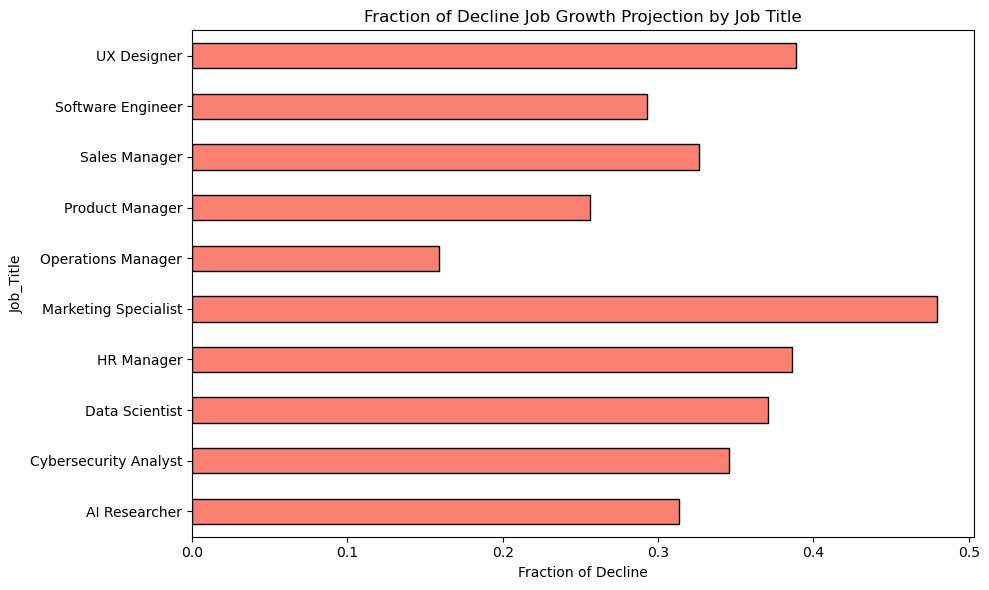

In [37]:
plt.figure(figsize=(10, 6))
decline_fraction.plot(kind='barh', color='salmon', edgecolor='black')
plt.xlabel('Fraction of Decline')
plt.title('Fraction of Decline Job Growth Projection by Job Title')
plt.tight_layout()
plt.show()

### Hypothesis Testing: AI Powered Job Market Data

#### Encode Categories:

In [38]:
AI_Powered_Job_Market["AI_Adoption_Level"] = pd.Categorical(AI_Powered_Job_Market["AI_Adoption_Level"], categories=["Low", "Medium", "High"], ordered=True)
AI_Powered_Job_Market["Automation_Risk"] = pd.Categorical(AI_Powered_Job_Market["Automation_Risk"], categories=["Low", "Medium", "High"], ordered=True)
AI_Powered_Job_Market["Job_Growth_Projection"] = pd.Categorical(AI_Powered_Job_Market["Job_Growth_Projection"], categories=["Decline", "Stable", "Growth"], ordered=True)

#### T-Test (AI Job Salary vs. Non-AI Job Salary) --> Two-Tailed Test

We are testing whether there is a statistically significant difference in salaries between jobs with high AI adoption and jobs with low AI adoption.

Null: The mean salary of high AI adoption jobs is equal to the mean salary of low AI adoption jobs

ALternate: The mean salary of high AI adoption jobs is different from the mean salary of low AI adoption jobs.

In [39]:
ai_jobs = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "High"]["Salary_USD"]
non_ai_jobs = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "Low"]["Salary_USD"]

t_stat, p_value = stats.ttest_ind(ai_jobs, non_ai_jobs, nan_policy='omit')

print("T-Test: Salary in AI vs. Non-AI Jobs")
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("\nConclusion: Reject the null hypothesis. \nThere is a statistically significant difference in salaries \nbetween high AI adoption jobs and low AI adoption jobs.")
else:
    print("\nConclusion: Fail to reject the null hypothesis. There is no statistically significant difference in salaries between high AI adoption jobs and low AI adoption jobs.")

T-Test: Salary in AI vs. Non-AI Jobs
T-Statistic: -2.4602, P-Value: 0.0144

Conclusion: Reject the null hypothesis. 
There is a statistically significant difference in salaries 
between high AI adoption jobs and low AI adoption jobs.


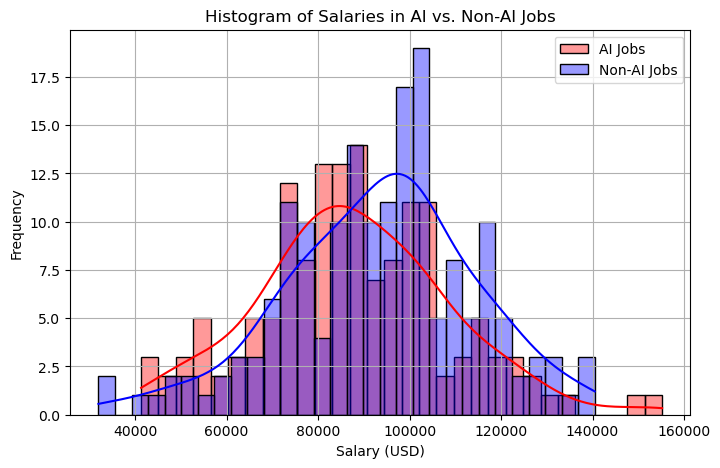

In [40]:
plt.figure(figsize=(8, 5))
sns.histplot(ai_jobs, bins=30, kde=True, label="AI Jobs", alpha=0.4, color='red')
sns.histplot(non_ai_jobs, bins=30, kde=True, label="Non-AI Jobs", alpha=0.4, color='blue')
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.title("Histogram of Salaries in AI vs. Non-AI Jobs")
plt.legend()
plt.grid(True)
plt.show()


#### Chi-Squared Test: AI Adoption vs. Job Growth Projection

We are testing whether there is a significant association between AI adoption levels and job growth projections.

Null: There is no association between AI adoption level and job growth projection (job growth projection is independent of AI adoption)

Alternate: There is a significant association between AI adoption level and job growth projection (AI adoption may influence job growth projections)

In [41]:
contingency_table = pd.crosstab(AI_Powered_Job_Market["AI_Adoption_Level"], AI_Powered_Job_Market["Job_Growth_Projection"])

In [42]:
contingency_table

Job_Growth_Projection,Decline,Stable,Growth
AI_Adoption_Level,,,
Low,52,61,61
Medium,62,55,62
High,55,46,46


In [43]:
chi2_stat, chi2_p_value, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-Square Test: AI Adoption vs. Job Growth Projection")
print(f"Chi-Square Statistic: {chi2_stat:.4f}, P-Value: {chi2_p_value:.4f}")

if chi2_p_value < 0.05:
    print("\nConclusion: Reject the null hypothesis. There is a significant association between AI adoption level and job growth projection.")
else:
    print("\nConclusion: Fail to reject the null hypothesis. \nThere is no significant association between a job's \nAI adoption level and job growth projection.")

Chi-Square Test: AI Adoption vs. Job Growth Projection
Chi-Square Statistic: 2.3761, P-Value: 0.6670

Conclusion: Fail to reject the null hypothesis. 
There is no significant association between a job's 
AI adoption level and job growth projection.


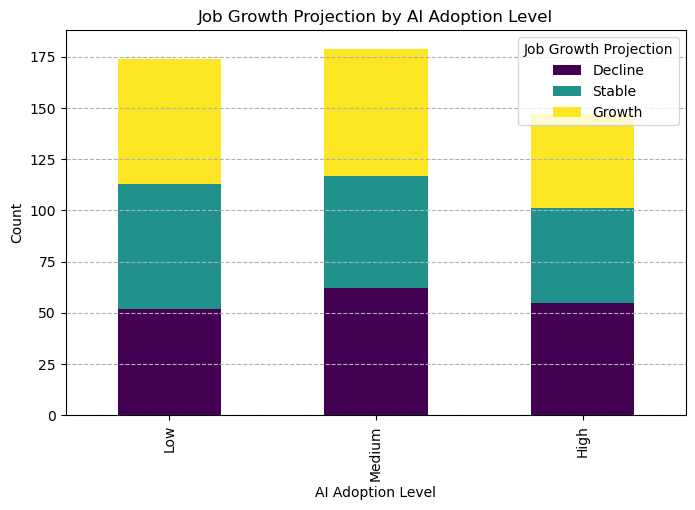

In [44]:
contingency_table.plot(kind='bar', stacked=True, figsize=(8,5), colormap="viridis")
plt.title("Job Growth Projection by AI Adoption Level")
plt.xlabel("AI Adoption Level")
plt.ylabel("Count")
plt.legend(title="Job Growth Projection")
plt.grid(axis='y', linestyle="--")
plt.show()

#### Mann-Whitney U test

We are testing whether the distribution of job postings across industries differs significantly ebtween AI-heavy vs traditional / low AI-adoption industries.

Null: The distribution of job postings across industries is the same between AI-heavy and traditional industries (AI adoption does not significantly affect the distribution of job postings across industries)

Alternate: The distribution of job postings across industries differs between AI-heavy and traditional industries (some industries might have significantly more AI-heavy job postings compared to traditional jobs)

In [45]:
ai_industries = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "High"]["Industry"].value_counts()
non_ai_industries = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "Low"]["Industry"].value_counts()

common_industries = ai_industries.index.intersection(non_ai_industries.index)
ai_industries = ai_industries[common_industries]
non_ai_industries = non_ai_industries[common_industries]

mwu_stat, mwu_p_value = stats.mannwhitneyu(ai_industries, non_ai_industries, alternative="two-sided")

print("Mann-Whitney U Test: Job Posting Distributions in AI-heavy vs. Traditional Industries")
print(f"Test/U-Statistic: {mwu_stat:.4f}, P-Value: {mwu_p_value:.4f}")

if mwu_p_value < 0.10:
    print("\nConclusion: Reject the null hypothesis (90% significance). \nThe distribution of job postings across industries \ndiffers significantly between AI-heavy \nand traditional industries. However, \nat at 95% significance, we would fail to reject the null (not significantly different).")
else:
    print("\nConclusion: Fail to reject the null hypothesis (90% significance). The distribution of job postings across industries is not significantly different between AI-heavy and traditional industries.")


Mann-Whitney U Test: Job Posting Distributions in AI-heavy vs. Traditional Industries
Test/U-Statistic: 24.0000, P-Value: 0.0525

Conclusion: Reject the null hypothesis (90% significance). 
The distribution of job postings across industries 
differs significantly between AI-heavy 
and traditional industries. However, 
at at 95% significance, we would fail to reject the null (not significantly different).


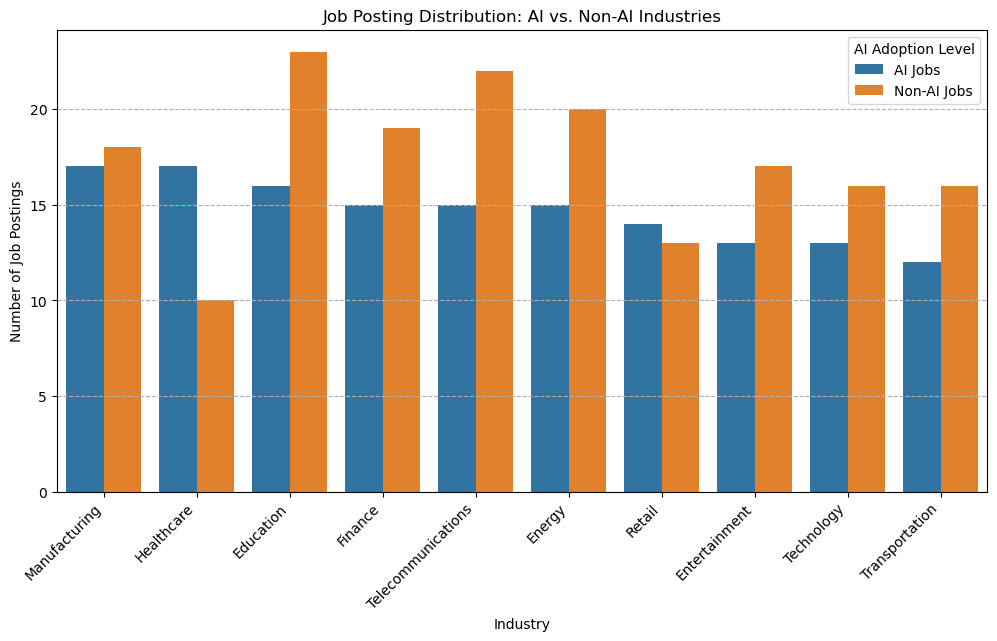

In [46]:
common_industries = ai_industries.index.intersection(non_ai_industries.index)
ai_industries = ai_industries[common_industries]
non_ai_industries = non_ai_industries[common_industries]

industry_data = pd.DataFrame({
    "Industry": common_industries,
    "AI Jobs": ai_industries.values,
    "Non-AI Jobs": non_ai_industries.values
}).melt(id_vars="Industry", var_name="AI_Adoption", value_name="Job Count")

plt.figure(figsize=(12, 6))
sns.barplot(data=industry_data, x="Industry", y="Job Count", hue="AI_Adoption")
plt.xticks(rotation=45, ha="right")
plt.title("Job Posting Distribution: AI vs. Non-AI Industries")
plt.xlabel("Industry")
plt.ylabel("Number of Job Postings")
plt.legend(title="AI Adoption Level")
plt.grid(axis='y', linestyle="--")
plt.show()

#### Kolmogorov-Smirnov (K-S) Test: AI vs. Non-AI Job Growth Distribution

We are testing to see whether the distribution of job growth projections differs significantly between AI-heavy and non-AI industries.

Null: The distribution of job growth projections is the same for AI-heavy and non-AI jobs (AI adoption does not significantly impact job growth trends)

Alternate: The job growth distribution differs between AI-heavy and non-AI jobs (AI adoption is influencing job growth to a point where it makes its distribution different from non-AI jobs)

In [47]:
job_growth_mapping = {"Decline": -1, "Stable": 0, "Growth": 1}
AI_Powered_Job_Market["Job_Growth_Numeric"] = AI_Powered_Job_Market["Job_Growth_Projection"].map(job_growth_mapping)

ai_job_growth = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "High"]["Job_Growth_Numeric"]
non_ai_job_growth = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "Low"]["Job_Growth_Numeric"]

ks_stat, ks_p_value = stats.ks_2samp(ai_job_growth, non_ai_job_growth)

print("Kolmogorov-Smirnov (K-S) Test: AI vs. Non-AI Job Growth Distribution")
print(f"K-S Statistic: {ks_stat:.4f}, P-Value: {ks_p_value:.4f}")

if ks_p_value < 0.05:
    print("\nConclusion: Reject the null hypothesis. The distribution of job growth projections is significantly different between AI-heavy and non-AI jobs.")
else:
    print("\nConclusion: Fail to reject the null hypothesis. \nThe job growth distribution is not significantly different \nbetween AI-heavy and non-AI jobs.")

Kolmogorov-Smirnov (K-S) Test: AI vs. Non-AI Job Growth Distribution
K-S Statistic: 0.0753, P-Value: 0.7190

Conclusion: Fail to reject the null hypothesis. 
The job growth distribution is not significantly different 
between AI-heavy and non-AI jobs.


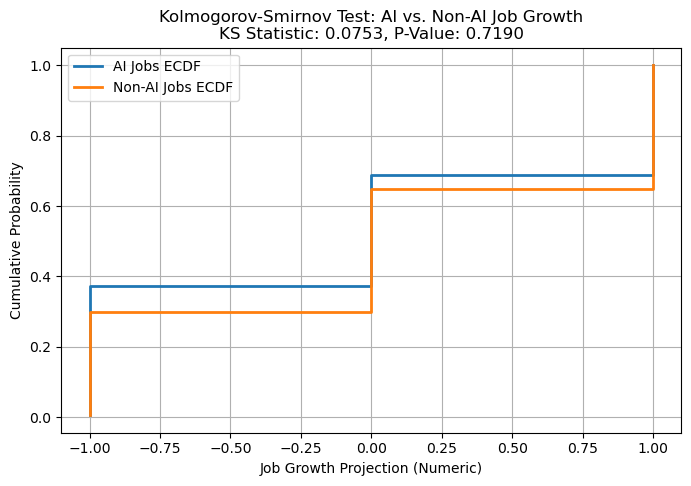

In [48]:
job_growth_mapping = {"Decline": -1, "Stable": 0, "Growth": 1}

AI_Powered_Job_Market["Job_Growth_Numeric"] = AI_Powered_Job_Market["Job_Growth_Projection"].map(job_growth_mapping)

ai_job_growth = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "High"]["Job_Growth_Numeric"]
non_ai_job_growth = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "Low"]["Job_Growth_Numeric"]

ks_stat, ks_p_value = ks_2samp(ai_job_growth, non_ai_job_growth)

ai_sorted = np.sort(ai_job_growth)
non_ai_sorted = np.sort(non_ai_job_growth)
ai_ecdf = np.arange(1, len(ai_sorted) + 1) / len(ai_sorted)
non_ai_ecdf = np.arange(1, len(non_ai_sorted) + 1) / len(non_ai_sorted)

plt.figure(figsize=(8, 5))
plt.plot(ai_sorted, ai_ecdf, label="AI Jobs ECDF", drawstyle='steps-post', lw=2)
plt.plot(non_ai_sorted, non_ai_ecdf, label="Non-AI Jobs ECDF", drawstyle='steps-post', lw=2)
plt.xlabel("Job Growth Projection (Numeric)")
plt.ylabel("Cumulative Probability")
plt.title(f"Kolmogorov-Smirnov Test: AI vs. Non-AI Job Growth\nKS Statistic: {ks_stat:.4f}, P-Value: {ks_p_value:.4f}")
plt.legend()
plt.grid(True)
plt.show()

### OLS Regression Modeling (AI Powered Job Market Data)

We will be predicting salary (in USD) based on other covariates in an AI-driven economy.

#### Convert Categorical Data into Encodings

In [49]:
AI_Powered_Job_Market.drop(columns=["Job_Growth_Numeric"], inplace=True)

categorical_cols = [
    "Job_Title", "Industry", "Location", "Required_Skills", 
    "Remote_Friendly", "Company_Size", "AI_Adoption_Level", 
    "Automation_Risk", "Job_Growth_Projection"
]

for col in categorical_cols:
    AI_Powered_Job_Market[col] = AI_Powered_Job_Market[col].astype("category")

AI_Powered_Job_Market = pd.get_dummies(AI_Powered_Job_Market, drop_first=True)

print(AI_Powered_Job_Market.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Salary_USD                          500 non-null    float64
 1   Job_Title_Cybersecurity Analyst     500 non-null    uint8  
 2   Job_Title_Data Scientist            500 non-null    uint8  
 3   Job_Title_HR Manager                500 non-null    uint8  
 4   Job_Title_Marketing Specialist      500 non-null    uint8  
 5   Job_Title_Operations Manager        500 non-null    uint8  
 6   Job_Title_Product Manager           500 non-null    uint8  
 7   Job_Title_Sales Manager             500 non-null    uint8  
 8   Job_Title_Software Engineer         500 non-null    uint8  
 9   Job_Title_UX Designer               500 non-null    uint8  
 10  Industry_Energy                     500 non-null    uint8  
 11  Industry_Entertainment              500 non-n

### Feature Selection (AI Powered Job Market Data)

#### Testing Multiple Linear Regression with All Covariates

In [50]:
AI_Powered_Job_Market.columns = (
    AI_Powered_Job_Market.columns
    .str.replace(" ", "_")
    .str.replace("-", "_")
    .str.replace("/", "_")
)
feature_columns = AI_Powered_Job_Market.columns.drop("Salary_USD")

formula = "Salary_USD ~ " + " + ".join(feature_columns)

full_model = smf.ols(formula, data=AI_Powered_Job_Market).fit()

print(full_model.summary())


                            OLS Regression Results                            
Dep. Variable:             Salary_USD   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.231
Date:                Sun, 16 Mar 2025   Prob (F-statistic):              0.152
Time:                        07:00:06   Log-Likelihood:                -5644.4
No. Observations:                 500   AIC:                         1.138e+04
Df Residuals:                     454   BIC:                         1.157e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

#### Using Covariates that are Statistically Significant at the 15% Level

In [87]:
significant_vars = full_model.pvalues[full_model.pvalues < 0.15]

if "Intercept" in significant_vars.index:
    significant_vars = significant_vars.drop("Intercept")

print("The covariates that are statistically significant at the 15% significance level are:")
print('\n'.join([sig_col for sig_col in significant_vars.index]))

significant_formula = "Salary_USD ~ " + " + ".join(significant_vars.index)
significant_formula_print = "Salary_USD ~ " + " + \n".join(significant_vars.index)
print("\nRefined Model Formula:\n", significant_formula_print)

The covariates that are statistically significant at the 15% significance level are:
Job_Title_Cybersecurity_Analyst
Job_Title_HR_Manager
Job_Title_Software_Engineer
Industry_Manufacturing
Industry_Transportation
AI_Adoption_Level_High
Automation_Risk_Medium
Required_Skills_JavaScript
Job_Growth_Projection_Growth

Refined Model Formula:
 Salary_USD ~ Job_Title_Cybersecurity_Analyst + 
Job_Title_HR_Manager + 
Job_Title_Software_Engineer + 
Industry_Manufacturing + 
Industry_Transportation + 
AI_Adoption_Level_High + 
Automation_Risk_Medium + 
Required_Skills_JavaScript + 
Job_Growth_Projection_Growth


In [88]:
statistically_significant_model = smf.ols(significant_formula, data=AI_Powered_Job_Market).fit()
print(statistically_significant_model.summary())

                            OLS Regression Results                            
Dep. Variable:             Salary_USD   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     4.162
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           3.43e-05
Time:                        07:35:29   Log-Likelihood:                -5654.7
No. Observations:                 500   AIC:                         1.133e+04
Df Residuals:                     490   BIC:                         1.137e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

#### Check Multicollinearity of Statistically Significant Features

In [91]:
exog = statistically_significant_model.model.exog
names = statistically_significant_model.model.exog_names

for i in range(1, exog.shape[1]):
    print(f'VIF: {names[i]}: {variance_inflation_factor(exog, i): .3f}')


VIF: Job_Title_Cybersecurity_Analyst:  1.050
VIF: Job_Title_HR_Manager:  1.047
VIF: Job_Title_Software_Engineer:  1.030
VIF: Industry_Manufacturing:  1.016
VIF: Industry_Transportation:  1.023
VIF: AI_Adoption_Level_High:  1.008
VIF: Automation_Risk_Medium:  1.027
VIF: Required_Skills_JavaScript:  1.007
VIF: Job_Growth_Projection_Growth:  1.013


#### Running Backward Selection with BIC Criterion (Starting with Full Model)
**Note**: Credits to Professor Siddharth Vishwanath for the code below, as the skeleton was given below for backward selection + BIC (we had to fill it in for one of the homeworks).

In [93]:
def criterion_aic(formula, df):
    model = smf.ols(formula, df).fit()
    return model.aic

def criterion_bic(formula, df):
    """
    Calculate the BIC for a given regression model formula and given dataframe.

    Parameters:
    formula (str): The regression model formula.
    df (pandas.DataFrame): The dataframe containing the data.

    Returns:
    float: The BIC value of the fitted model.
    """
    model = smf.ols(formula, df).fit()
    criterion_value = model.bic
    return criterion_value

def remove(df, already_selected_columns, criterion, response='y'):
    """
    Identify the worst column to remove based on the given criterion.
    REMEMBER: The smaller the criterion, the better the model.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the data.
    already_selected_columns (set): The set of currently selected columns.
    criterion (function): The criterion function to evaluate the model.
    response (str): The response variable name.

    Returns:
    tuple: The worst column to remove and its criterion value.
    """

    # initialize the worst criterion and column to None
    worst_criterion = float('inf')
    worst_column = None

    # iterate over the already selected columns to find the worst column to remove
    for column in already_selected_columns:
        new_columns = already_selected_columns - {column}
        formula = f'{response} ~ {" + ".join(new_columns)}' if new_columns else f'{response} ~ 1'
        current_criterion = criterion(formula, df)
        if current_criterion < worst_criterion:
            worst_criterion = current_criterion
            worst_column = column
    return worst_column, worst_criterion

def backward(df, criterion, response='y'):
    """
    Perform backward selection to find the optimal model based on the given criterion.
    REMEMBER: The smallest criterion value is considered the best model fit.
    
    Parameters:
    df (pandas.DataFrame): The dataframe containing the data.
    criterion (function): The criterion function to evaluate the model.
    response (str): The response variable name.

    Returns:
    set: The set of selected columns in the optimal model.
    """

    # initialize the set of already selected columns to all columns except the response variable
    already_selected_columns = set(df.columns.drop(response))
    best_criterion = criterion(f'{response} ~ {" + ".join(already_selected_columns)}', df)
    while len(already_selected_columns) > 0:

        # identify the worst column to remove based on the given criterion
        potential_column, current_criterion = remove(df, already_selected_columns, criterion, response)

        # check if the model with the worst column removed has a better criterion value
        if current_criterion <= best_criterion:
            already_selected_columns = already_selected_columns - {potential_column}
            best_criterion = current_criterion
            print(f'Criterion: {best_criterion}')
        else:
            break
    final_selection = already_selected_columns
    return final_selection

In [95]:
selected_features_bic = backward(AI_Powered_Job_Market, criterion_bic, response="Salary_USD")
print("Selected Features for OLS (backward selection + BIC):", selected_features_bic)


Criterion: 11568.43166796542
Criterion: 11562.225637660153
Criterion: 11556.0235811842
Criterion: 11549.82206281629
Criterion: 11543.630083419166
Criterion: 11537.447456341148
Criterion: 11531.29596481062
Criterion: 11525.174618486259
Criterion: 11519.087488705287
Criterion: 11512.9991810823
Criterion: 11506.906522042746
Criterion: 11500.854559224023
Criterion: 11494.80886278098
Criterion: 11488.718368745293
Criterion: 11482.686190569699
Criterion: 11476.679976279811
Criterion: 11470.720406359042
Criterion: 11464.790085338038
Criterion: 11458.82731190615
Criterion: 11452.871749893922
Criterion: 11446.963661385758
Criterion: 11441.122316266354
Criterion: 11435.266870480371
Criterion: 11429.456829054048
Criterion: 11424.307930395416
Criterion: 11419.418081925383
Criterion: 11414.55473368748
Criterion: 11409.502806032207
Criterion: 11404.136873525455
Criterion: 11398.684908906944
Criterion: 11393.717477824865
Criterion: 11388.931455537624
Criterion: 11384.070474574988
Criterion: 11379.282

#### Running OLS using Selected Features from Backward Selection + BIC Criterion

In [100]:
backwards_bic_formula = 'Salary_USD ~ ' + ' + '.join(selected_features_bic)

backwards_bic_model = smf.ols(backwards_bic_formula, data=AI_Powered_Job_Market).fit()

print(backwards_bic_model.summary())

                            OLS Regression Results                            
Dep. Variable:             Salary_USD   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     7.075
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           0.000934
Time:                        07:50:31   Log-Likelihood:                -5666.1
No. Observations:                 500   AIC:                         1.134e+04
Df Residuals:                     497   BIC:                         1.135e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

#### Running Backward Selection with AIC Criterion (Starting with Full Model)

In [102]:
selected_features_aic = backward(AI_Powered_Job_Market, criterion_aic, response="Salary_USD")
print("Selected Features for OLS (backward selection + AIC):", selected_features_aic)

Criterion: 11378.774303536422
Criterion: 11376.782881329576
Criterion: 11374.795432952045
Criterion: 11372.808522682559
Criterion: 11370.831151383856
Criterion: 11368.86313240426
Criterion: 11366.926248972155
Criterion: 11365.019510746215
Criterion: 11363.146989063665
Criterion: 11361.2732895391
Criterion: 11359.395238597968
Criterion: 11357.557883877667
Criterion: 11355.726795533046
Criterion: 11353.850909595782
Criterion: 11352.033339518612
Criterion: 11350.241733327146
Criterion: 11348.496771504799
Criterion: 11346.781058582217
Criterion: 11345.032893248752
Criterion: 11343.291939334946
Criterion: 11341.598458925204
Criterion: 11339.971721904221
Criterion: 11338.33088421666
Criterion: 11336.73545088876
Criterion: 11335.80116032855
Criterion: 11335.12591995694
Criterion: 11334.477179817459
Criterion: 11333.639860260608
Criterion: 11332.488535852277
Criterion: 11331.251179332188
Criterion: 11330.498356348531
Criterion: 11329.926942159713
Criterion: 11329.280569295499
Criterion: 11328.

#### Running OLS using Selected Features from Backward Selection + AIC Criterion

In [103]:
backwards_aic_formula = 'Salary_USD ~ ' + ' + '.join(selected_features_aic)

backwards_aic_model = smf.ols(backwards_aic_formula, data=AI_Powered_Job_Market).fit()

print(backwards_aic_model.summary())

                            OLS Regression Results                            
Dep. Variable:             Salary_USD   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     5.338
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           6.65e-06
Time:                        07:53:16   Log-Likelihood:                -5654.9
No. Observations:                 500   AIC:                         1.133e+04
Df Residuals:                     492   BIC:                         1.136e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

| Model | R-Squared | Adjusted R-Squared |
|:---:|:---:|:---:|
| All Covariates | 0.109 | 0.020 |
| Statistically Significant (0.15) | 0.071 | 0.054 |
| Backward Selection + BIC | 0.028 | 0.024 |
| **Backward Selection + AIC** | **0.071** | **0.057** |



After testing multiple OLS models with various subsets of covariates by performing different feature selection techniques, we found that Backward Selection with AIC criterion achieved the best R-Squared and Adjusted R-Squared. Based off these findings, Backward Selection + AIC model retains enough covariates to maximize Adjusted R-Squared while avoiding unnecessary predictors. However, it's important to note that the Statistically Significant (at the 15\% level) model performed similarly which may indicate that AIC’s selection aligns closely with variables that hold moderate statistical significance. The Backward Selection + BIC model on the other hand, which imposes a stricter penalty on complexity and prioritizes a simpler model, resulted in a much lower R-Squared, hinting underfitting. Given these findings, the AIC-selected model is the most appropriate for further refinement, which we will use going forward. We will validate linear assumptions to check if the results of this model are reliable and test interaction terms amongst selected covariates to look further into nonlinear relationships in our data and potentially improve model performance.

### Testing Linear Assumptions on Our Best Model (Backward Selection + AIC)

#### Linearity & Homoscedasticity

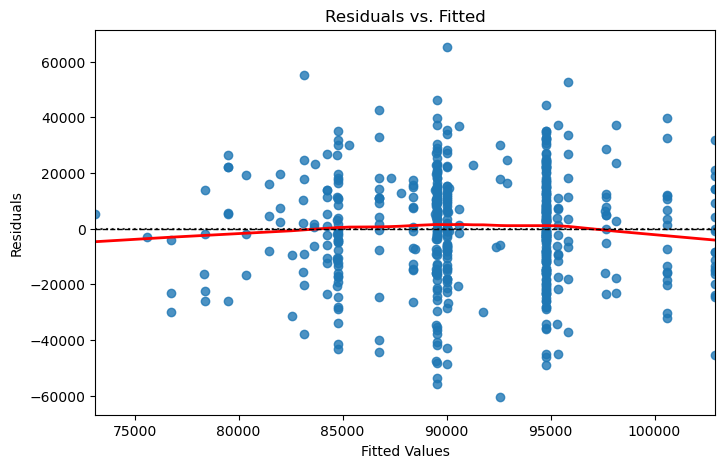

In [135]:
fitted_vals = backwards_aic_model.fittedvalues
backwards_residuals = backwards_aic_model.resid

plt.figure(figsize=(8,5))
sns.residplot(x=fitted_vals, y=backwards_residuals, lowess=True, line_kws={"color": "red", "lw": 2})
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted")
plt.show()


/Users/adrianapsay/miniforge3/envs/dsc80/lib/python3.8/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/Users/adrianapsay/miniforge3/envs/dsc80/lib/python3.8/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/Users/adrianapsay/miniforge3/envs/dsc80/lib/python3.8/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/Users/adrianapsay/miniforge3/envs/dsc80/lib/python3.8/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/Users/adrianapsay/miniforge3/envs/dsc80/lib/python3.8/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarni

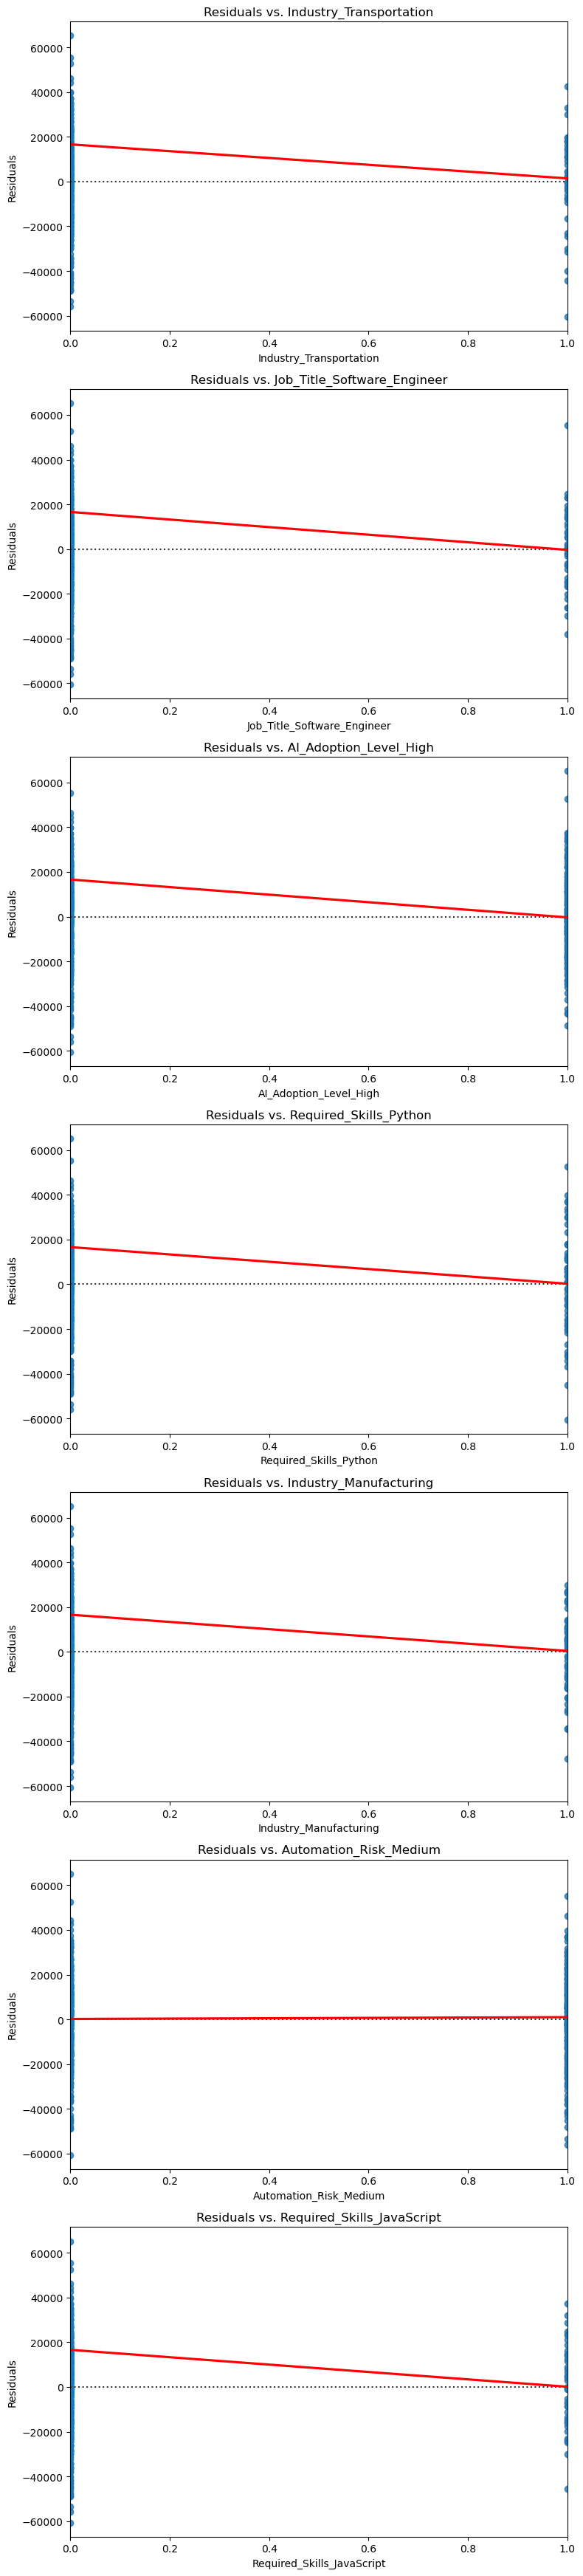

In [136]:
predictors = selected_features_aic

fig, axes = plt.subplots(nrows=len(predictors), figsize=(8, 5 * len(predictors)))

for i, predictor in enumerate(predictors):
    sns.residplot(x=AI_Powered_Job_Market[predictor], y=backwards_aic_model.resid, lowess=True, line_kws={'color': 'red'}, ax=axes[i])
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel("Residuals")
    axes[i].set_title(f"Residuals vs. {predictor}")

plt.tight_layout()
plt.show()


To ensure our regression model satisfies the linearity assumption, we used residuals vs. fitted plots and residuals vs. individual covariates plots. These plots help us check whether the relationship between our covariates and the dependent variable, `Salary_USD` is correctly modeled as linear. If the residuals are randomly scattered around zero, it suggests that the linear specification is appropriate. In the residuals vs. fitted plot, we observed that the LOWESS (red) line remains mostly flat, indicating that our model captures the general trend well, though there is a slight curvature which may mean minor nonlinear effects. Similarly, in the residuals vs. categorical covariates plots, the residuals show no strong patterns, displaying no major violations of linearity. However, a slight downward trend in some covariates, such as Job Title, AI Adoption Level, and Industry, suggests that interaction effects may be missing, which handles nonlinear relationships that could be present in the data (albeit not that strong). Additionally, the spread of residuals appears relatively constant, also passing the homoscedasticity assumption. Given these findings, our model is reasonably well-specified, but adding interaction terms may improve its predictive performance to handle some nonlinear relationships that may be present within the data.

To check for homoscedasticity, we can use the same graphs of plotted residuals vs. fitted values and residuals vs. independent variables to see if the spread of residuals remains constant. If heteroscedasticity were present, we would expect a funnel pattern, where residuals either widen or narrow as fitted values increase. In the Residuals vs. Fitted plot, the residuals appear randomly scattered, with no clear increase or decrease in spread, suggesting constant variance. In the Residuals vs. Independent Variables plots, the residuals do not show increasing or decreasing spread across different categorical predictors, supporting homoscedasticity. While some covariates (e.g., Job Title, AI Adoption Level, Industry) show a slight downward trend in the LOWESS line, this does not indicate heteroscedasticity but suggests potential missing interaction effects amongst the covariates as iterated before.

#### Independence

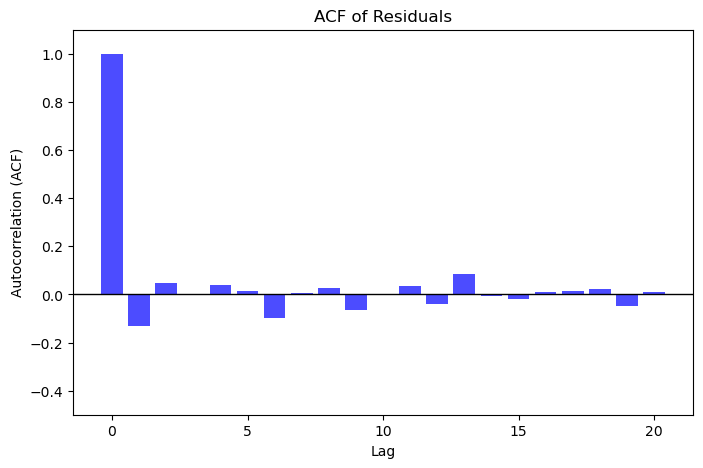

In [137]:
lags = 20
acf_values = acf(backwards_aic_model.resid, nlags=lags)

plt.figure(figsize=(8,5))
plt.bar(range(lags+1), acf_values, color="blue", alpha=0.7)
plt.axhline(y=0, color='black', linewidth=1)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation (ACF)")
plt.title("ACF of Residuals")
plt.ylim(-0.5, 1.1)

plt.show()


The Autocorrelation Function (ACF) plot is used to check whether the residuals of a regression model are independent, meaning that the errors do not systematically depend on previous values. If residuals are autocorrelated, it suggests that the model is missing key patterns, which can lead to biased standard errors and unreliable predictions. In this plot, the bars represent the correlation between residuals at different lags, with lag 0 always being 1 (because residuals are perfectly correlated with themselves). Since all bars fall close to zero and do not exceed ±0.2, there is no strong evidence of autocorrelation, meaning that each residual is independent of the others. There is also no gradual decay, indicating that the residuals do not follow a time-based trend. As a result, the independence assumption holds.

#### Normality

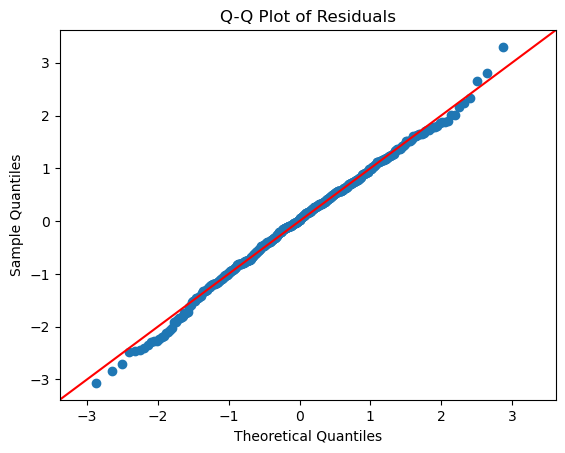

Shapiro-Wilk Test p-value: 0.34011828899383545


In [138]:
sm.qqplot(backwards_residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

shapiro_test = stats.shapiro(backwards_residuals)
print(f"Shapiro-Wilk Test p-value: {shapiro_test.pvalue}")


We can check whether the residuals of our model follow a normal distribution (normality) using a Q-Q plot and the Shapiro-Wilk test. In the Q-Q plot, the residuals align closely with the red 45-degree line, meaning they largely follow a normal distribution, with only minor deviations at the extreme tails. This suggests that normality holds reasonably well, though slight skewness or heavy tails may be present. The Shapiro-Wilk test p-value (0.340) is greater than 0.05, meaning we fail to reject the null hypothesis that the residuals are normally distributed. The results confirm that the model does not violate normality.

#### Multicollinearity of Features

In [139]:
exog = backwards_aic_model.model.exog
names = backwards_aic_model.model.exog_names

for i in range(1, exog.shape[1]):
    print(f'VIF: {names[i]}: {variance_inflation_factor(exog, i): .3f}')

VIF: Industry_Transportation:  1.026
VIF: Job_Title_Software_Engineer:  1.007
VIF: AI_Adoption_Level_High:  1.006
VIF: Required_Skills_Python:  1.025
VIF: Industry_Manufacturing:  1.016
VIF: Automation_Risk_Medium:  1.010
VIF: Required_Skills_JavaScript:  1.018


We also checked our model's covariate for multicollinearity by calculating the Variance Inflation Factor (VIF) for each covariate. All of our predictors have VIF values close to 1, meaning they are nearly independent of each other. Since no covariates show high multicollinearity, no adjustments with our covariates are needed. This also confirms that our regression coefficients are reliable and interpretable.

### Overall Findings of Linear Assumptions on our Best Model

Our model passes all linear assumptions. However, granted that the tests for assumptions indicated potential nonlinear relationships amongst covariates, we will investigate interaction terms that can represent those relationships and potentially improve model performance.

### Testing our Best Model with Interaction Terms

In [126]:
interaction_formula = (
    "Salary_USD ~ Industry_Transportation + Job_Title_Software_Engineer + "
    "AI_Adoption_Level_High + Required_Skills_Python + Industry_Manufacturing + "
    "Automation_Risk_Medium + Required_Skills_JavaScript + "
    "Industry_Manufacturing:Automation_Risk_Medium + Job_Title_Software_Engineer:AI_Adoption_Level_High + "
    "Industry_Transportation:AI_Adoption_Level_High"
)

interaction_model = smf.ols(interaction_formula, data=AI_Powered_Job_Market).fit()

print(interaction_model.summary())


                            OLS Regression Results                            
Dep. Variable:             Salary_USD   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     4.165
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           1.50e-05
Time:                        11:26:35   Log-Likelihood:                -5652.7
No. Observations:                 500   AIC:                         1.133e+04
Df Residuals:                     489   BIC:                         1.137e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

Our R-Squared and Adjusted R-Squared seemed to increase adding the interaction terms!

### Seeing if Assumptions Still Hold w/ Interaction Terms

#### Linearity & Homoscedasticity

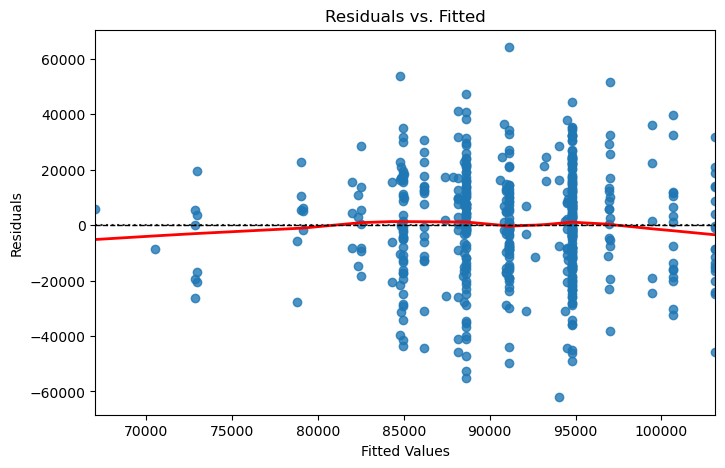

In [140]:
fitted_vals = interaction_model.fittedvalues
interaction_residuals = interaction_model.resid

plt.figure(figsize=(8,5))
sns.residplot(x=fitted_vals, y=interaction_residuals, lowess=True, line_kws={"color": "red", "lw": 2})
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted")
plt.show()


/Users/adrianapsay/miniforge3/envs/dsc80/lib/python3.8/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/Users/adrianapsay/miniforge3/envs/dsc80/lib/python3.8/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/Users/adrianapsay/miniforge3/envs/dsc80/lib/python3.8/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/Users/adrianapsay/miniforge3/envs/dsc80/lib/python3.8/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/Users/adrianapsay/miniforge3/envs/dsc80/lib/python3.8/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarni

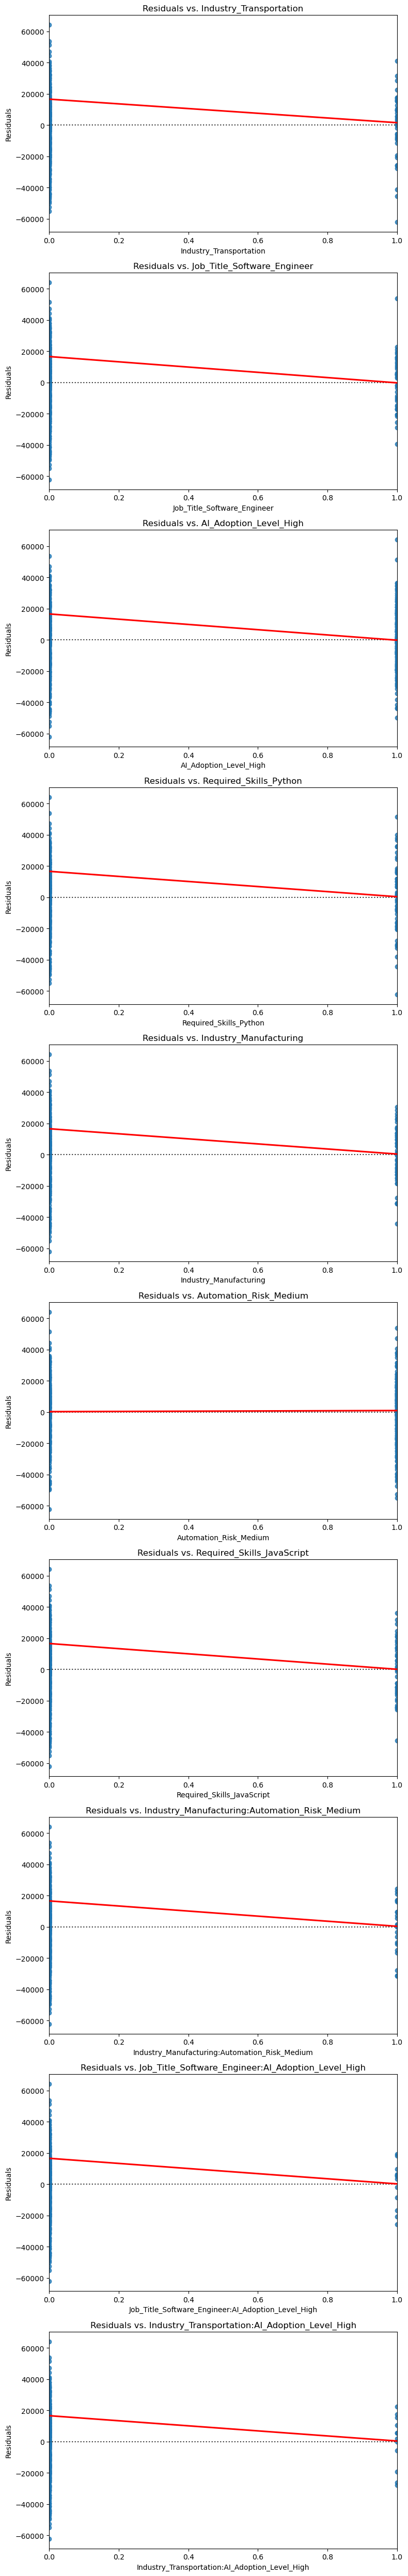

In [131]:
df_interactions = AI_Powered_Job_Market.copy()

df_interactions["Industry_Manufacturing:Automation_Risk_Medium"] = (
    df_interactions["Industry_Manufacturing"] * df_interactions["Automation_Risk_Medium"]
)

df_interactions["Job_Title_Software_Engineer:AI_Adoption_Level_High"] = (
    df_interactions["Job_Title_Software_Engineer"] * df_interactions["AI_Adoption_Level_High"]
)

df_interactions["Industry_Transportation:AI_Adoption_Level_High"] = (
    df_interactions["Industry_Transportation"] * df_interactions["AI_Adoption_Level_High"]
)


predictors = interaction_model.model.exog_names[1:]

fig, axes = plt.subplots(nrows=len(predictors), figsize=(8, 5 * len(predictors)))

for i, predictor in enumerate(predictors):
    sns.residplot(x=df_interactions[predictor], y=interaction_model.resid, lowess=True, line_kws={'color': 'red'}, ax=axes[i])
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel("Residuals")
    axes[i].set_title(f"Residuals vs. {predictor}")

plt.tight_layout()
plt.show()


#### Independence

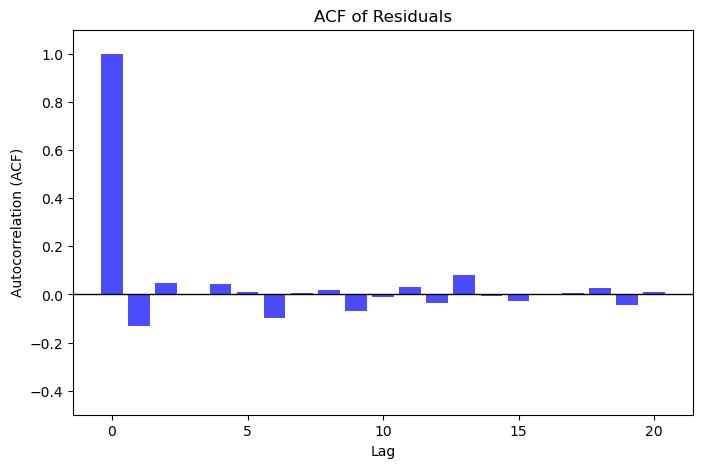

In [133]:
lags = 20
acf_values = acf(interaction_model.resid, nlags=lags)

plt.figure(figsize=(8,5))
plt.bar(range(lags+1), acf_values, color="blue", alpha=0.7)
plt.axhline(y=0, color='black', linewidth=1)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation (ACF)")
plt.title("ACF of Residuals")
plt.ylim(-0.5, 1.1)

plt.show()


#### Normality

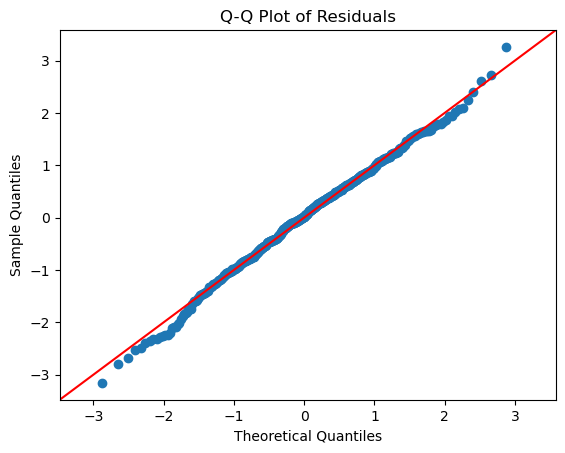

Shapiro-Wilk Test p-value: 0.3139723539352417


In [141]:
sm.qqplot(interaction_residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

shapiro_test = stats.shapiro(interaction_residuals)
print(f"Shapiro-Wilk Test p-value: {shapiro_test.pvalue}")


### Findings & Interpretations of the Covariates and Coefficients

It seems that with the interaction terms, the assumptions still hold true, making this model interpretable for this dataset and our use case in predicting salary in an AI-Powered Job Market. We wanted to predict salary to see what kinds of jobs might be the most lucrative in an AI-driven economy as the contextualization of our world's economy and job market today revolves around AI. Here are the interpretations of the covariates and their coefficients:

| Covariate | Coefficient | Interpretation |
|:---|---:|:---|
| **Industry_Transportation** | -6647.76 | Jobs in the transportation industry tend to have lower salaries, possibly due to slower AI adoption and automation constraints. |
| **Job_Title_Software_Engineer** | -3827.88 | Software engineers earn slightly lower than average in this model, which may indicate market saturation or shifts in demand towards AI-oriented roles. |
| **AI_Adoption_Level_High** | -3674.31 | Higher AI adoption is correlated with slightly lower salaries, suggesting automation might be reducing the need for highly-paid specialists in some roles. |
| **Required_Skills_Python** | 5919.65 | Python skills are associated with higher salaries, likely due to its heavy use in AI, data science, and automation tasks. |
| **Industry_Manufacturing** | -8597.74 | The manufacturing sector sees lower salaries, potentially due to high automation replacing human labor, reducing wage growth. |
| **Automation_Risk_Medium** | -6172.98 | Jobs at medium risk of automation tend to have lower salaries, possibly due to uncertainty in long-term stability. |
| **Required_Skills_JavaScript** | 8369.22 | JavaScript skills are linked to higher salaries, likely reflecting demand for web-based AI applications and front-end development for AI-powered platforms. |
| **Industry_Manufacturing × Automation_Risk_Medium** | 8491.93 | The combination of working in manufacturing with moderate automation risk slightly increases salary, possibly due to the need for specialized skills in AI-driven automation. |
| **Job_Title_Software_Engineer × AI_Adoption_Level_High** | -8172.39 | High AI adoption in software engineering roles may reduce salaries, suggesting companies are automating more tasks or outsourcing to lower-cost regions. |
| **Industry_Transportation × AI_Adoption_Level_High** | -5427.93 | AI adoption in transportation may not yet be increasing salaries, possibly due to ongoing automation reducing the value of human labor in the sector. |


Our R-Squared and Adjusted R-Squared seemed to increase adding the interaction terms, capturing the relationship among covariates together in the data.

### Our Best OLS Model After Vigorously Tuning Using Statistical Methods: Backwards-Selection + AIC-criterion and Interaction Terms

In [142]:
interaction_formula = (
    "Salary_USD ~ Industry_Transportation + Job_Title_Software_Engineer + "
    "AI_Adoption_Level_High + Required_Skills_Python + Industry_Manufacturing + "
    "Automation_Risk_Medium + Required_Skills_JavaScript + "
    "Industry_Manufacturing:Automation_Risk_Medium + Job_Title_Software_Engineer:AI_Adoption_Level_High + "
    "Industry_Transportation:AI_Adoption_Level_High"
)

interaction_model = smf.ols(interaction_formula, data=AI_Powered_Job_Market).fit()

print(interaction_model.summary())


                            OLS Regression Results                            
Dep. Variable:             Salary_USD   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     4.165
Date:                Sun, 16 Mar 2025   Prob (F-statistic):           1.50e-05
Time:                        12:11:18   Log-Likelihood:                -5652.7
No. Observations:                 500   AIC:                         1.133e+04
Df Residuals:                     489   BIC:                         1.137e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

### Overall Limitations of the Data

Despite proper preprocessing (i.e. encoding categories into numerical values), testing different OLS regression models (full, statistically significant features, backward-selected + BIC-criterion features, backward-selected + AIC-criterion features, and interaction terms), and testing linear assumptions for our best model (OLS model with features from backwards-selection and AIC along with interaction terms), it seems that the covariates are simply not good predictors alone in predicting Salary (USD) due to low R^2 and adjusted R^2. While we've thoroughly applied statistical rigor in tuning the model, our R^2 and adjusted R^2 hint that there are probably other unobserved covariates not present in the dataset that has major influence on salary, such as years of experience, educational background, and company funding. We could utilize other non-linear methods to estimate Salary USD, such as decision trees or random forest, but that is out the scope of this class and thus our analysis.

## Binary Classification: Predicting Jobs that are at Low or High Risk of Automation

### Logistic Regression: Predict Whether a Job is at Low or High Risk of Automation

In [143]:
AI_Powered_Job_Market = pd.read_csv('ai_job_market_insights.csv')

#### Preprocessing

In [144]:
AI_Powered_Job_Market = AI_Powered_Job_Market[AI_Powered_Job_Market["Automation_Risk"] != "Medium"]

categorical_cols = [
    "AI_Adoption_Level", "Industry", "Company_Size", 
    "Job_Growth_Projection", "Remote_Friendly"
]

for col in categorical_cols:
    AI_Powered_Job_Market[col] = AI_Powered_Job_Market[col].astype("category")

AI_Powered_Job_Market["Automation_Risk_Binary"] = AI_Powered_Job_Market["Automation_Risk"].apply(
    lambda x: 1 if x == "High" else 0
)

df_encoded = pd.get_dummies(AI_Powered_Job_Market, drop_first=True)

#### Using all Features for Logistic Regression

In [145]:
X = df_encoded.drop(columns=["Automation_Risk_Binary", "Automation_Risk_Low"]) # remove directly correlated covariates (prevent data leakage)
y = df_encoded["Automation_Risk_Binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=500, class_weight='balanced')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


Accuracy: 0.439
Precision: 0.375
Recall: 0.414
F1 Score: 0.393


Using all features are not that good.

#### Using Backward Selection to Select Features for Logistic Regression (AIC and BIC criterion)

In [146]:
df_encoded.columns

Index(['Salary_USD', 'Automation_Risk_Binary',
       'Job_Title_Cybersecurity Analyst', 'Job_Title_Data Scientist',
       'Job_Title_HR Manager', 'Job_Title_Marketing Specialist',
       'Job_Title_Operations Manager', 'Job_Title_Product Manager',
       'Job_Title_Sales Manager', 'Job_Title_Software Engineer',
       'Job_Title_UX Designer', 'Industry_Energy', 'Industry_Entertainment',
       'Industry_Finance', 'Industry_Healthcare', 'Industry_Manufacturing',
       'Industry_Retail', 'Industry_Technology', 'Industry_Telecommunications',
       'Industry_Transportation', 'Company_Size_Medium', 'Company_Size_Small',
       'Location_Dubai', 'Location_London', 'Location_New York',
       'Location_Paris', 'Location_San Francisco', 'Location_Singapore',
       'Location_Sydney', 'Location_Tokyo', 'Location_Toronto',
       'AI_Adoption_Level_Low', 'AI_Adoption_Level_Medium',
       'Automation_Risk_Low', 'Required_Skills_Cybersecurity',
       'Required_Skills_Data Analysis', 'Require

In [147]:
correlations = df_encoded.corr()['Automation_Risk_Binary'].sort_values(ascending=False)

print("Features Causing Perfect Separation (we need to remove these...):")
print(correlations[abs(correlations) >= 0.99])

Features Causing Perfect Separation (we need to remove these...):
Automation_Risk_Binary    1.0
Automation_Risk_Low      -1.0
Name: Automation_Risk_Binary, dtype: float64


##### Backwards + BIC 

In [148]:
df_encoded = df_encoded.drop(columns=['Automation_Risk_Low'])
df_encoded.columns = (
    df_encoded.columns
    .str.replace(" ", "_")
    .str.replace("-", "_")
    .str.replace("/", "_")
)
bic_selected_features = backward(df_encoded, criterion_bic, response="Automation_Risk_Binary")
print("\nFinal Selected Features:", bic_selected_features)

Criterion: 688.5784149511587
Criterion: 682.7891333703463
Criterion: 677.0021100695618
Criterion: 671.220486249422
Criterion: 665.4415992387312
Criterion: 659.67043651448
Criterion: 653.9223819186162
Criterion: 648.1887103337564
Criterion: 642.5215023947148
Criterion: 636.8908353058923
Criterion: 631.2680259932927
Criterion: 625.6514496510497
Criterion: 620.0945346206926
Criterion: 614.5151425216415
Criterion: 609.0201319797268
Criterion: 603.5222270729357
Criterion: 598.0571704550005
Criterion: 592.5981334111586
Criterion: 587.1509361479899
Criterion: 581.8417558549634
Criterion: 576.5232895480915
Criterion: 571.2303382883663
Criterion: 566.1241966293705
Criterion: 561.1043339685391
Criterion: 556.1645510896462
Criterion: 550.9677620143204
Criterion: 545.7343316773806
Criterion: 540.4203007910525
Criterion: 535.5151146720549
Criterion: 530.6099157109159
Criterion: 526.0623248409067
Criterion: 521.3070552083452
Criterion: 516.8086309124822
Criterion: 512.4164603085175
Criterion: 507.93

Findings: It seems that using BIC-criterion and backwards selection removes all features, meaning that no features significantly improve the model. Since the criterion removes all features, it suggests that the model with no predictors is preferable. This may indicate that none of the covariates in this dataset alone are significant enough to predict a job's automation risk. Instead, we'll try Backwards + AIC, which penalizes less.

##### Backwards + AIC

In [149]:
aic_selected_features = backward(df_encoded, criterion_aic, response="Automation_Risk_Binary")
print("\nFinal Selected Features:", aic_selected_features)

Criterion: 521.8201674316796
Criterion: 519.8208460217645
Criterion: 517.8237828918772
Criterion: 515.8321192426347
Criterion: 513.843192402841
Criterion: 511.86198984948714
Criterion: 509.90389542452056
Criterion: 507.960184010558
Criterion: 506.0829362424138
Criterion: 504.24222932448845
Criterion: 502.409380182786
Criterion: 500.5827640114403
Criterion: 498.8158091519805
Criterion: 497.02637722382656
Criterion: 495.3213268528092
Criterion: 493.61338211691543
Criterion: 491.9382856698773
Criterion: 490.26920879693284
Criterion: 488.6119717046613
Criterion: 487.092751582532
Criterion: 485.5642454465574
Criterion: 484.06125435772947
Criterion: 482.74507286963103
Criterion: 481.51517037969677
Criterion: 480.3653476717012
Criterion: 478.9585187672726
Criterion: 477.51504860123003
Criterion: 475.9909778857991
Criterion: 474.8757519376988
Criterion: 473.7605131474571
Criterion: 473.0028824483452
Criterion: 472.0375729866809
Criterion: 471.3291088617151
Criterion: 470.7268984286477
Criterio

Findings: It seems that using AIC-criterion and backwards selection chose some important features, having a lower penalty in comparison to BIC (which has a harsher penalty). AIC prioritizes better prediction over model simplicity, so this makes sense. Let's test the AIC selected features.

In [150]:
X_aic_selected = df_encoded[list(aic_selected_features)]

X_train_aic, X_test_aic, y_train, y_test = train_test_split(X_aic_selected, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_aic = scaler.fit_transform(X_train_aic)
X_test_aic = scaler.transform(X_test_aic)

logreg_aic = LogisticRegression(max_iter=500, class_weight='balanced')
logreg_aic.fit(X_train_aic, y_train)

y_pred_aic = logreg_aic.predict(X_test_aic)

accuracy = accuracy_score(y_test, y_pred_aic)
precision = precision_score(y_test, y_pred_aic)
recall = recall_score(y_test, y_pred_aic)
f1 = f1_score(y_test, y_pred_aic)

print("Logistic Regression Model Performance After AIC Feature Selection:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


Logistic Regression Model Performance After AIC Feature Selection:
Accuracy: 0.606
Precision: 0.537
Recall: 0.759
F1 Score: 0.629


In [151]:
feature_names = list(aic_selected_features)
coefficients = logreg_aic.coef_[0]

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

coef_df

,Feature,Coefficient
2,Required_Skills_Sales,0.203757
1,Location_Singapore,0.158663
0,Job_Title_Data_Scientist,-0.216285
3,Company_Size_Medium,-0.245363
4,Job_Title_Operations_Manager,-0.331104


Using the AIC-selected features, there seems to be some improvement across all metrics. This is due to AIC keeping the strongest covariates, which in turn makes the predictions of jobs having high or low automation risk more reliable and generalizable.

### Performing SVM using Backwards Selection + AIC-selected features (alternative to logistic regression)

In [152]:
X_svm = df_encoded[list(aic_selected_features)]
y_svm = df_encoded["Automation_Risk_Binary"]

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_svm = scaler.fit_transform(X_train_svm)
X_test_svm = scaler.transform(X_test_svm)

svm_model = SVC(kernel='rbf', C=1.0, class_weight='balanced')
svm_model.fit(X_train_svm, y_train_svm)

y_pred_svm = svm_model.predict(X_test_svm)

accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)
precision_svm = precision_score(y_test_svm, y_pred_svm)
recall_svm = recall_score(y_test_svm, y_pred_svm)
f1_svm = f1_score(y_test_svm, y_pred_svm)

print("SVM Model Performance (AIC-Selected Features):")
print(f"Accuracy: {accuracy_svm:.3f}")
print(f"Precision: {precision_svm:.3f}")
print(f"Recall: {recall_svm:.3f}")
print(f"F1 Score: {f1_svm:.3f}")


SVM Model Performance (AIC-Selected Features):
Accuracy: 0.591
Precision: 0.525
Recall: 0.724
F1 Score: 0.609


Findings using SVM with Backwards Selection + AIC-selected features: SVM seems to slightly underperform to its logistic regression counterpart which also uses backward selection and AIC-selected features. This may be due to the added complexity of SVM not providing a meaningful advantage for the dataset and the covariates we are working with. Logistic regression is a simpler linear model which seems to generalize a bit better to the data, while SVM might be overfitting to patterns that don't significantly impact classifying whether a job is at low vs. high risk of automation. Given that most of our covariates in the AI Powered Job Market dataset is categorical and encoded, SVM to model the decision boundaries might not work as well and isn't that necessary for our use-case. Logistic regression seems to be a more effective and interpretable model for this classification task. Recall the metrics:

**SVM vs. Logistic Regression for Binary Classification to Predict Automation Risk (High / Low)**
| Model                 | Accuracy | Precision | Recall | F1 Score |
|:----------------------|---------:|:---------:|:------:|:--------:|
| Logistic Regression  | 0.606    | 0.537     | 0.759  | 0.629    |
| SVM                 | 0.591    | 0.525     | 0.724  | 0.609    |

The logistic regression model seems to outperform the SVM we created! Here are the coefficients of each covariate and their interpretation for our logistic regression model:

| Covariate | Coefficient | Interpretation |
|:---|---:|:---|
| Required Skills: Sales | 0.2038 | Jobs requiring sales skills are less likely to be automated, likely due to the human-driven nature of sales, relationship-building, and negotiation, which AI struggles to fully replicate. |
| Location: Singapore | 0.1587 | Jobs in Singapore are slightly less likely to face automation risk, potentially due to government investment in AI adaptation strategies, job reskilling programs, or an economy favoring AI-augmented roles rather than full automation. |
| Job Title: Data Scientist | -0.2163 | Data scientist roles are slightly more at risk of automation, which may suggest that some tasks, like data preprocessing and pattern recognition, are becoming increasingly automated with AI advancements. However, human oversight in complex decision-making remains essential. |
| Company Size: Medium | -0.2454 | Medium-sized companies may be more likely to automate roles compared to larger corporations, possibly due to cost-saving pressures and limited resources for extensive workforce training. |
| Job Title: Operations Manager | -0.3311 | Operations managers appear more likely to face automation risk, likely because AI-driven systems can streamline logistical planning, supply chain optimization, and process management, etc, which reduces the need for human oversight. |


As AI continues to reshape industries, predicting automation risk for jobs is crucial for understanding which roles are most vulnerable to automation displacement. Our logistic regression model, which performed slightly better than SVM, suggests that we can reasonably predict whether a job is at risk of automation based on key factors like industry, required skills, and AI adoption levels. The model’s high recall (75.9%) means it is effective at identifying jobs that are truly at risk, which is valuable for policymakers, businesses, and workers looking to adapt. However, its lower precision (53.7%) suggests some jobs may be misclassified as at risk when they are not, indicating that automation risk is complex and influenced by factors beyond what’s in our dataset. This aligns with real-world trends, where AI adoption does not always directly eliminate jobs but instead transforms job functions. The relatively modest accuracy (60.6%) also implies that other variables—such as company investment in AI, job retraining opportunities, or economic conditions—may play a significant role in automation risk. The SVM model, while slightly less effective, reinforces these findings, confirming that automation risk is largely predictable but not perfectly linear. These insights can be used to help industries prepare for workforce shifts, guide workers toward upskilling opportunities, and inform AI policy decisions. Overall, while our models provide a useful foundation for understanding job automation risk, further refinement with additional data could enhance their predictive power in an AI-driven economy.

It's important to note, however, that despite applying multiple modeling approaches—OLS (linear regression), logistic regression, and SVM—the dataset’s covariates did not yield strong predictive performance. This might suggest that they may not be well-suited for accurately modeling automation risk (binary classification) or salary (regression task). The dataset is heavily categorical, with features like Job Title, Industry, Location, and AI Adoption Level, but encoding these variables does not necessarily mean they provide meaningful patterns for prediction. Backward selection (using AIC/BIC as criterion) repeatedly eliminated all / a majority of features, indicating that many covariates lacked strong explanatory power or were redundant. Additionally, SVM’s inability to outperform logistic regression suggests that non-linearity was not the primary issue, but rather the dataset itself, as it may lack the necessary features that truly distinguishes automation risk effectively. Another critical limitation is that the dataset may be missing key numerical or behavioral factors, such as years of experience, educational background, job-specific AI integration levels, etc., which could better explain and predict automation risk and salary. Ultimately, the models struggled not because of improper methodology but because the dataset’s covariates alone do not appear to be strong predictors for these outcomes.

-----

## Dataset 2: AI Job Threat Index

### Data Cleaning and Exploratory Data Analysis (EDA): AI Job Threat Index

In [154]:
print("\nSummary statistics:")
print(AI_Job_Threat_Index.describe())


Summary statistics:
             Tasks    AI models  AI_Workload_Ratio
count  4706.000000  4706.000000        4706.000000
mean    400.708032  1817.678071                inf
std     311.564781  1086.853037                NaN
min       1.000000     0.000000           0.036585
25%     161.000000  1085.250000           0.137271
50%     270.000000  1577.500000           0.199281
75%     608.750000  2273.000000           0.260572
max    1387.000000  5666.000000                inf


#### Check for missing values

In [155]:
print("\nMissing values in each column:")
print(AI_Job_Threat_Index.isnull().sum())


Missing values in each column:
Job titiles          0
AI Impact            0
Tasks                0
AI models            0
AI_Workload_Ratio    0
Domain               0
dtype: int64


#### Change AI Impact to float instead of string

In [156]:
AI_Job_Threat_Index['AI Impact'] = AI_Job_Threat_Index['AI Impact'].str.rstrip('%').astype(float)/ 100
AI_Job_Threat_Index.head()

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,0.98,365,2546,0.143362,Communication & PR
1,Data Collector,0.95,299,2148,0.139199,Data & IT
2,Data Entry,0.95,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,0.95,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,0.92,194,1369,0.141709,Medical & Healthcare


In [157]:
for col in AI_Job_Threat_Index.select_dtypes(include=['object']).columns:
    AI_Job_Threat_Index[col] = AI_Job_Threat_Index[col].astype('category')
AI_Job_Threat_Index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4706 entries, 0 to 4705
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Job titiles        4706 non-null   category
 1   AI Impact          4706 non-null   float64 
 2   Tasks              4706 non-null   int64   
 3   AI models          4706 non-null   int64   
 4   AI_Workload_Ratio  4706 non-null   float64 
 5   Domain             4706 non-null   category
dtypes: category(2), float64(2), int64(2)
memory usage: 327.2 KB


#### plot box plot for each quantity column to see if there are some outliners

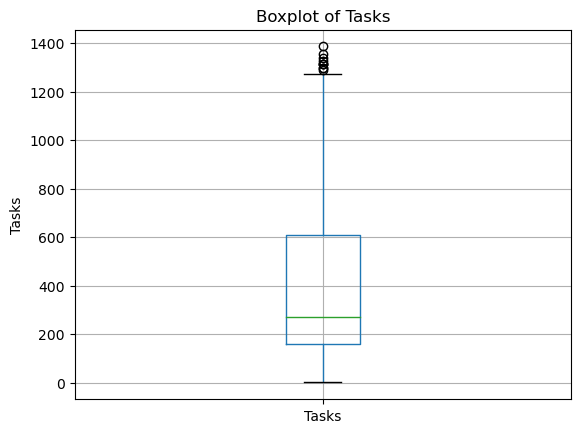

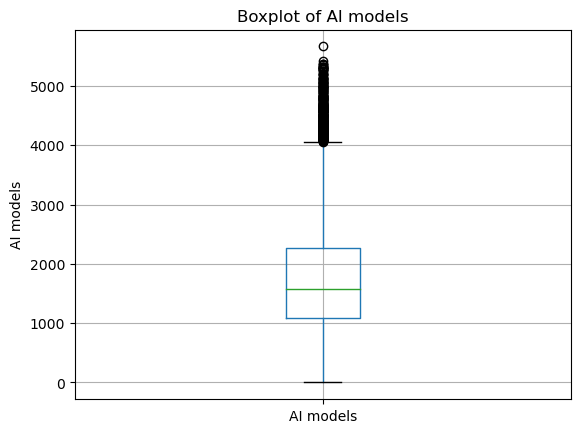

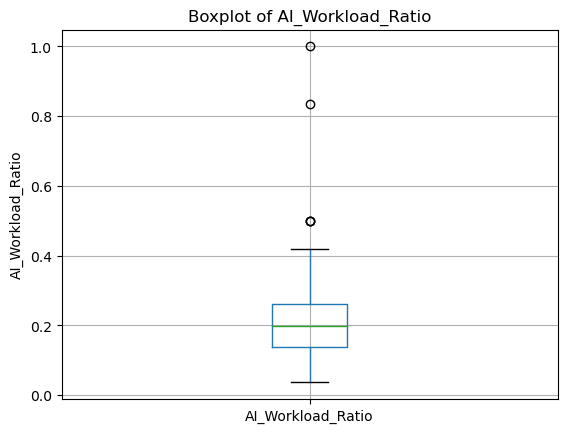

In [158]:
quant_features = ['Tasks', 'AI models', 'AI_Workload_Ratio']
for col in quant_features:
    plt.figure()
    AI_Job_Threat_Index.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

In [159]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data


In [160]:
filtered_df = AI_Job_Threat_Index.copy()
for col in quant_features:
    filtered_df = remove_outliers(filtered_df, col)

filtered_df.columns = filtered_df.columns.str.replace(' ', '_')
filtered_df = filtered_df.rename(columns={'Job_titiles': "Job_titles"})
filtered_df.head()

,Job_titles,AI_Impact,Tasks,AI_models,AI_Workload_Ratio,Domain
0,Communications Manager,0.98,365,2546,0.143362,Communication & PR
1,Data Collector,0.95,299,2148,0.139199,Data & IT
2,Data Entry,0.95,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,0.95,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,0.92,194,1369,0.141709,Medical & Healthcare


#### Scatter plot: Tasks vs. AI Workload Ratio

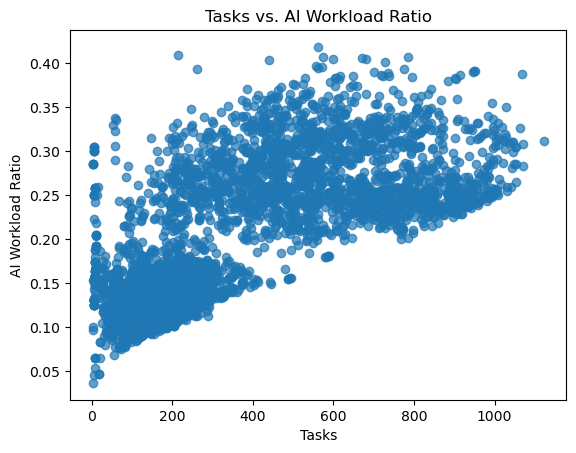

In [161]:
plt.figure()
plt.scatter(filtered_df['Tasks'], filtered_df['AI_Workload_Ratio'], alpha=0.7)
plt.title("Tasks vs. AI Workload Ratio")
plt.xlabel("Tasks")
plt.ylabel("AI Workload Ratio")
plt.show()

#### Scatter plot for AI Impact vs. AI_Workload_Ratio

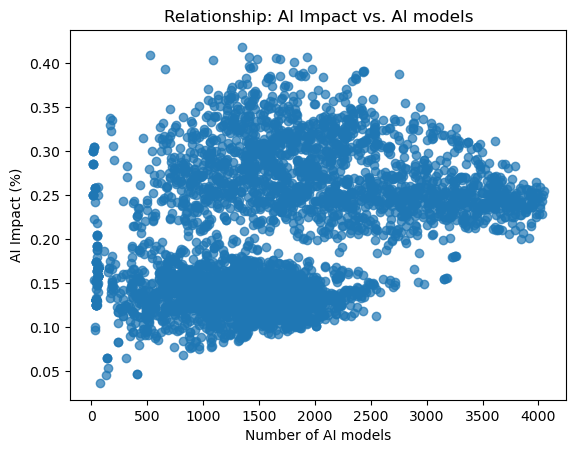

Correlation between AI Impact and AI models: 0.3666787077129089


In [162]:
# Scatter plot for AI Impact vs. AI models
plt.figure()
plt.scatter(filtered_df['AI_models'], filtered_df['AI_Workload_Ratio'], alpha=0.7)
plt.title("Relationship: AI Impact vs. AI models")
plt.xlabel("Number of AI models")
plt.ylabel("AI Impact (%)")
plt.show()

# Calculate Pearson correlation coefficient
corr_coef_models, p_value_models = pearsonr(filtered_df['AI_models'], filtered_df['AI_Workload_Ratio'])
print("Correlation between AI Impact and AI models:", corr_coef_models)

#### Scatter plot for AI Impact vs. AI models

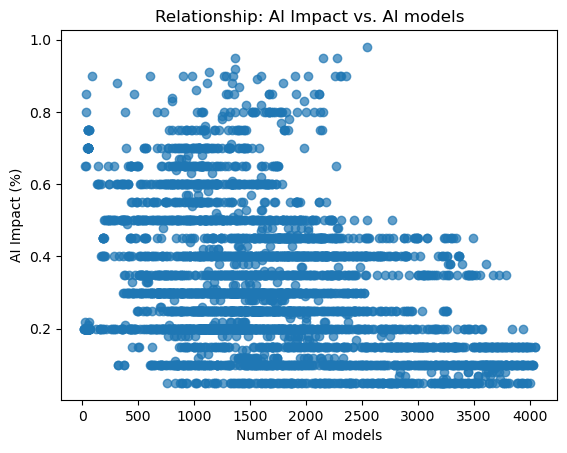

Correlation between AI Impact and AI models: -0.3508933375313581


In [163]:
# Scatter plot for AI Impact vs. AI models
plt.figure()
plt.scatter(filtered_df['AI_models'], filtered_df['AI_Impact'], alpha=0.7)
plt.title("Relationship: AI Impact vs. AI models")
plt.xlabel("Number of AI models")
plt.ylabel("AI Impact (%)")
plt.show()

# Calculate Pearson correlation coefficient
corr_coef_models, p_value_models = pearsonr(filtered_df['AI_models'], filtered_df['AI_Impact'])
print("Correlation between AI Impact and AI models:", corr_coef_models)

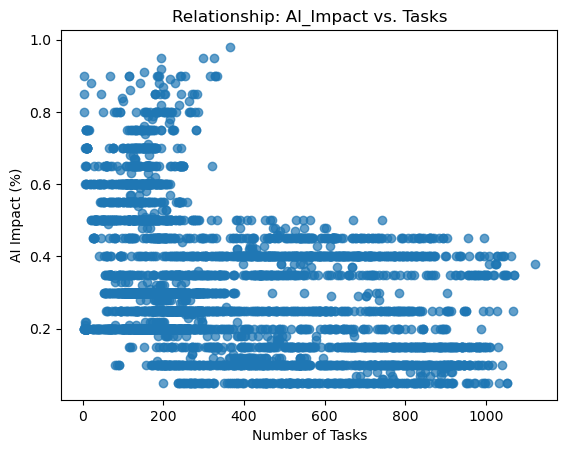

Correlation between AI Impact and Tasks: -0.358320537551422


In [164]:
plt.figure()
plt.scatter(filtered_df['Tasks'], filtered_df['AI_Impact'], alpha=0.7)
plt.title("Relationship: AI_Impact vs. Tasks")
plt.xlabel("Number of Tasks")
plt.ylabel("AI Impact (%)")
plt.show()

# Calculate Pearson correlation coefficient
corr_coef, p_value = pearsonr(filtered_df['Tasks'], filtered_df['AI_Impact'])
print("Correlation between AI Impact and Tasks:", corr_coef)

### Hypothesis Testing: AI Job Threat Index

In [165]:
filtered_df.head()

,Job_titles,AI_Impact,Tasks,AI_models,AI_Workload_Ratio,Domain
0,Communications Manager,0.98,365,2546,0.143362,Communication & PR
1,Data Collector,0.95,299,2148,0.139199,Data & IT
2,Data Entry,0.95,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,0.95,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,0.92,194,1369,0.141709,Medical & Healthcare


#### Chi-Squared Test

Test if there is a significant relationship between AI Workload Ratio and AI Impact level.

Null: AI Workload Ratio and AI Impact are independent (i.e., the level of AI reliance in a job does not impact its AI Impact).

Alternate: AI Workload Ratio and AI Impact are dependent (i.e., jobs with higher AI Workload Ratios tend to have higher AI Impact scores)


In [166]:
threshold = 0.5
filtered_df["AI_Impact_Binary"] = filtered_df["AI_Impact"].apply(lambda x: "High" if x >= threshold else "Low")

filtered_df["AI_Workload_Category"] = pd.qcut(filtered_df["AI_Workload_Ratio"], q=3, labels=["Low", "Medium", "High"])

contingency_table = pd.crosstab(filtered_df["AI_Workload_Category"], filtered_df["AI_Impact_Binary"])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test: AI Workload Ratio vs. AI Impact")
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("\nConclusion: Reject Null. \nAI Workload Ratio is significantly associated with AI Impact level.")
else:
    print("Conclusion: Fail to reject Null. No significant relationship between AI Workload Ratio and AI Impact.")


Chi-Square Test: AI Workload Ratio vs. AI Impact
Chi-Square Statistic: 990.9796
P-Value: 0.0000

Conclusion: Reject Null. 
AI Workload Ratio is significantly associated with AI Impact level.


#### Mann-Whitney U Test
Test whether jobs with more tasks tend to have significantly different AI Impact scores than jobs with fewer tasks.

Null: The distribution of AI Impact is the same for jobs with high vs. low task complexity.

Alternate: The AI Impact distribution differs between jobs with high vs. low task complexity.

Note that we split jobs into two groups: low-task complexity (jobs with below-median tasks) vs high-task complexity (jobs with above-median tasks). Then, we run the Mann-Whitney U Test.

Mann-Whitney U Test: AI Impact vs. Job Complexity (Tasks)
Median Split (Task Complexity Threshold): 252.0
U-Statistic: 3418598.5000
P-Value: 0.0000

Conclusion: Reject Null. 
AI Impact is significantly different between low-task and high-task jobs.


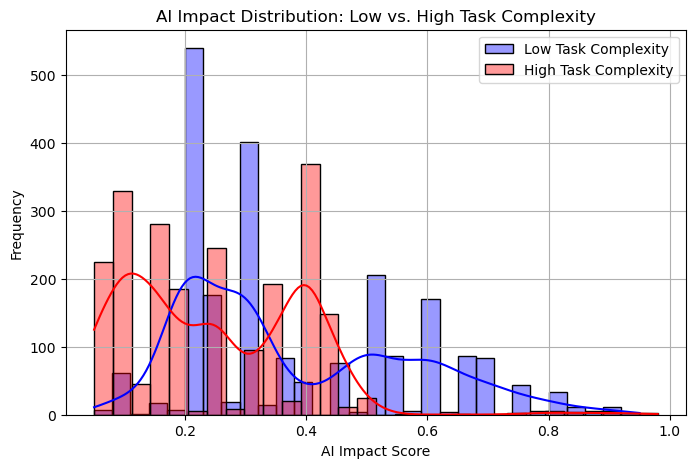

In [167]:
median_tasks = filtered_df["Tasks"].median()

low_task_jobs = filtered_df[filtered_df["Tasks"] <= median_tasks]["AI_Impact"]
high_task_jobs = filtered_df[filtered_df["Tasks"] > median_tasks]["AI_Impact"]

mwu_stat, mwu_p_value = stats.mannwhitneyu(low_task_jobs, high_task_jobs, alternative="two-sided")

print("Mann-Whitney U Test: AI Impact vs. Job Complexity (Tasks)")
print(f"Median Split (Task Complexity Threshold): {median_tasks}")
print(f"U-Statistic: {mwu_stat:.4f}")
print(f"P-Value: {mwu_p_value:.4f}")


if mwu_p_value < 0.05:
    print("\nConclusion: Reject Null. \nAI Impact is significantly different between low-task and high-task jobs.")
else:
    print("Conclusion: Fail to reject Null. No significant difference in AI Impact based on task complexity.")


plt.figure(figsize=(8, 5))
sns.histplot(low_task_jobs, bins=30, kde=True, label="Low Task Complexity", alpha=0.4, color='blue')
sns.histplot(high_task_jobs, bins=30, kde=True, label="High Task Complexity", alpha=0.4, color='red')
plt.xlabel("AI Impact Score")
plt.ylabel("Frequency")
plt.title("AI Impact Distribution: Low vs. High Task Complexity")
plt.legend()
plt.grid(True)
plt.show()


#### K-S Test
See if very distinct job domains have significantly different AI Impact distributions. In this test, we will use `Data & IT` and `Construction`.

Null: The AI Impact distribution is the same across very different job domains.

Alternate: The AI Impact distribution differs between job domains.

In [168]:
filtered_df["Domain"].unique()

['Communication & PR', 'Data & IT', 'Administrative & Clerical', 'Leadership & Strategy', 'Medical & Healthcare', 'Supply Chain & Logistics', 'Law Enforcement', 'Construction', 'Sales & Marketing', 'Hospitality']
Categories (10, object): ['Administrative & Clerical', 'Communication & PR', 'Construction', 'Data & IT', ..., 'Leadership & Strategy', 'Medical & Healthcare', 'Sales & Marketing', 'Supply Chain & Logistics']

Kolmogorov-Smirnov (K-S) Test: AI Impact Distribution Across Job Domains
Comparing: Data & IT vs. Construction
K-S Statistic: 0.0156
P-Value: 1.0000

Conclusion: Fail to reject Null. 
No significant difference in AI Impact distributions between 
two distinctly different job domains.


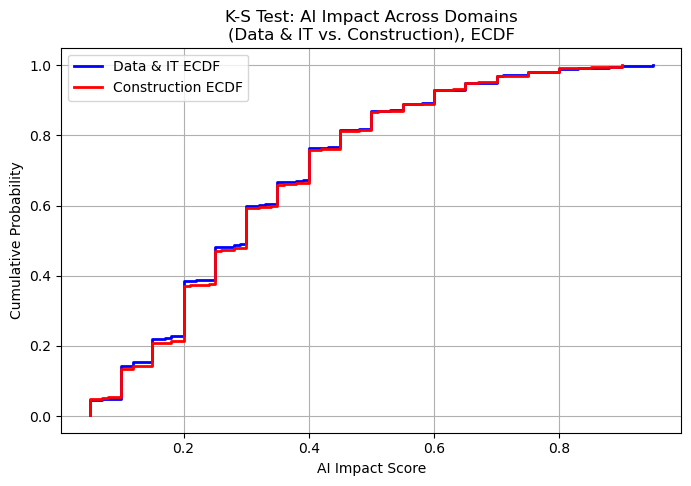

In [169]:
domain_1 = "Data & IT"
domain_2 = "Construction"

ai_impact_domain_1 = filtered_df[filtered_df["Domain"] == domain_1]["AI_Impact"]
ai_impact_domain_2 = filtered_df[filtered_df["Domain"] == domain_2]["AI_Impact"]

ks_stat, ks_p_value = ks_2samp(ai_impact_domain_1, ai_impact_domain_2)

print("Kolmogorov-Smirnov (K-S) Test: AI Impact Distribution Across Job Domains")
print(f"Comparing: {domain_1} vs. {domain_2}")
print(f"K-S Statistic: {ks_stat:.4f}")
print(f"P-Value: {ks_p_value:.4f}")

# 
if ks_p_value < 0.05:
    print(f"Conclusion: Reject Null. AI Impact distributions are significantly different between {domain_1} and {domain_2}.")
else:
    print(f"\nConclusion: Fail to reject Null. \nNo significant difference in AI Impact distributions between \ntwo distinctly different job domains.")

ai_sorted_1 = np.sort(ai_impact_domain_1)
ai_sorted_2 = np.sort(ai_impact_domain_2)
ecdf_1 = np.arange(1, len(ai_sorted_1) + 1) / len(ai_sorted_1)
ecdf_2 = np.arange(1, len(ai_sorted_2) + 1) / len(ai_sorted_2)

plt.figure(figsize=(8, 5))
plt.plot(ai_sorted_1, ecdf_1, label=f"{domain_1} ECDF", drawstyle='steps-post', lw=2, color="blue")
plt.plot(ai_sorted_2, ecdf_2, label=f"{domain_2} ECDF", drawstyle='steps-post', lw=2, color="red")
plt.xlabel("AI Impact Score")
plt.ylabel("Cumulative Probability")
plt.title(f"K-S Test: AI Impact Across Domains\n({domain_1} vs. {domain_2}), ECDF")
plt.legend()
plt.grid(True)
plt.show()


The K-S Test above makes sense, as there is no difference in AI Impact distributions regardless of domain. AI_Impact is similar across all domains. See below:

In [170]:
filtered_df.groupby('Domain').mean()

,AI_Impact,Tasks,AI_models,AI_Workload_Ratio
Domain,,,,
Administrative & Clerical,0.315385,352.149321,1643.144796,0.200763
Communication & PR,0.312650,364.610245,1706.830735,0.198257
Construction,0.317195,357.301149,1641.908046,0.201529
Data & IT,0.313978,352.991011,1660.842697,0.197483
Hospitality,0.314432,369.000000,1689.579545,0.201792
Law Enforcement,0.312387,364.290541,1636.671171,0.207713
Leadership & Strategy,0.316316,345.414188,1614.224256,0.201174
Medical & Healthcare,0.312815,346.315315,1609.315315,0.201840
Sales & Marketing,0.315950,363.919908,1673.643021,0.202119


### OLS Regression Modeling (AI Job Threat Index)

We will be predicting AI Impact based on other covariates.

#### Data Preprocessing

In [295]:
AI_Job_Threat_Index = pd.read_csv('ai_job_threat_index.csv').rename(columns={'Job titiles': 'Job Titles', 'AI Impact': 'AI_Impact_Percent', 'AI models': 'AI_Models'})
# we will not be using job titles
AI_Job_Threat_Index = AI_Job_Threat_Index.drop(columns=['Job Titles'])
AI_Job_Threat_Index.head()

,AI_Impact_Percent,Tasks,AI_Models,AI_Workload_Ratio,Domain
0,98%,365,2546,0.143362,Communication & PR
1,95%,299,2148,0.139199,Data & IT
2,95%,325,2278,0.142669,Administrative & Clerical
3,95%,193,1366,0.141288,Leadership & Strategy
4,92%,194,1369,0.141709,Medical & Healthcare


In [296]:
AI_Job_Threat_Index['AI_Impact_Percent'] = AI_Job_Threat_Index['AI_Impact_Percent'].apply(lambda x: x.split('%')[0])
AI_Job_Threat_Index['AI_Impact_Percent'] = pd.to_numeric(AI_Job_Threat_Index['AI_Impact_Percent'])
AI_Job_Threat_Index['Domain'] = AI_Job_Threat_Index['Domain'].apply(lambda x: x.replace(' ', '_'))
AI_Job_Threat_Index['Domain'] = AI_Job_Threat_Index['Domain'].apply(lambda x: x.replace('&', 'and'))
AI_Job_Threat_Index.replace([np.inf, -np.inf], np.nan, inplace=True)
AI_Job_Threat_Index = AI_Job_Threat_Index.dropna()
AI_Job_Threat_Index.dtypes

AI_Impact_Percent      int64
Tasks                  int64
AI_Models              int64
AI_Workload_Ratio    float64
Domain                object
dtype: object

In [297]:
# for col in quant_features:
#     filtered_df = remove_outliers(filtered_df, col)

##### Encoding Categorical Variables

In [298]:
categorical = ["Domain"]
for col in categorical:
    AI_Job_Threat_Index[col] = AI_Job_Threat_Index[col].astype("category")

AI_Job_Threat_Index = pd.get_dummies(AI_Job_Threat_Index, drop_first=True)

AI_Job_Threat_Index.head()

,AI_Impact_Percent,Tasks,AI_Models,AI_Workload_Ratio,Domain_Communication_and_PR,Domain_Construction,Domain_Data_and_IT,Domain_Hospitality,Domain_Law_Enforcement,Domain_Leadership_and_Strategy,Domain_Medical_and_Healthcare,Domain_Sales_and_Marketing,Domain_Supply_Chain_and_Logistics
0,98,365,2546,0.143362,1,0,0,0,0,0,0,0,0
1,95,299,2148,0.139199,0,0,1,0,0,0,0,0,0
2,95,325,2278,0.142669,0,0,0,0,0,0,0,0,0
3,95,193,1366,0.141288,0,0,0,0,0,1,0,0,0
4,92,194,1369,0.141709,0,0,0,0,0,0,1,0,0


##### Removing Outliers

In [299]:
quant_features = ['Tasks', 'AI_Models', 'AI_Workload_Ratio']
for col in quant_features:
    AI_Job_Threat_Index = remove_outliers(AI_Job_Threat_Index, col)

### Feature Selection (AI Job Threat Index)

#### Backwards Selection + BIC

In [300]:
backward_bic_vars = backward(AI_Job_Threat_Index, criterion_bic, "AI_Impact_Percent")
backward_bic_vars

Criterion: 37498.555587861156
Criterion: 37490.162275496536
Criterion: 37481.770604726
Criterion: 37473.38633804514
Criterion: 37465.03163795067
Criterion: 37456.68255519468
Criterion: 37448.333759194036
Criterion: 37440.036365033906
Criterion: 37431.82745728788


{'AI_Models', 'AI_Workload_Ratio', 'Tasks'}

#### Testing Covariates Selected By Backwards Selection + BIC

In [301]:
backwards_bic_formula = ' + '.join(backward_bic_vars)
backwards_bic_model = smf.ols(f'AI_Impact_Percent ~ {backwards_bic_formula}', data = AI_Job_Threat_Index).fit()
print(backwards_bic_model.summary())

                            OLS Regression Results                            
Dep. Variable:      AI_Impact_Percent   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     278.7
Date:                Sun, 16 Mar 2025   Prob (F-statistic):          1.19e-165
Time:                        14:29:22   Log-Likelihood:                -18699.
No. Observations:                4419   AIC:                         3.741e+04
Df Residuals:                    4415   BIC:                         3.743e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            62.6006      1.82

#### Backwards Selection + AIC

In [302]:
backward_aic_vars = backward(AI_Job_Threat_Index, criterion_aic, "AI_Impact_Percent")
backward_aic_vars

Criterion: 37421.83156339959
Criterion: 37419.8319197401
Criterion: 37417.833917674696
Criterion: 37415.84331969896
Criterion: 37413.88228830962
Criterion: 37411.92687425877
Criterion: 37409.97174696325
Criterion: 37408.068021508254
Criterion: 37406.25278246736


{'AI_Models', 'AI_Workload_Ratio', 'Tasks'}

AIC and BIC seemed to find the same exact covariates, meaning that the selected features are likely the most predictive on AI Impact.

### Testing Linear Assumptions on Model Using Selected Features

#### Linearity & Homoscedasticity

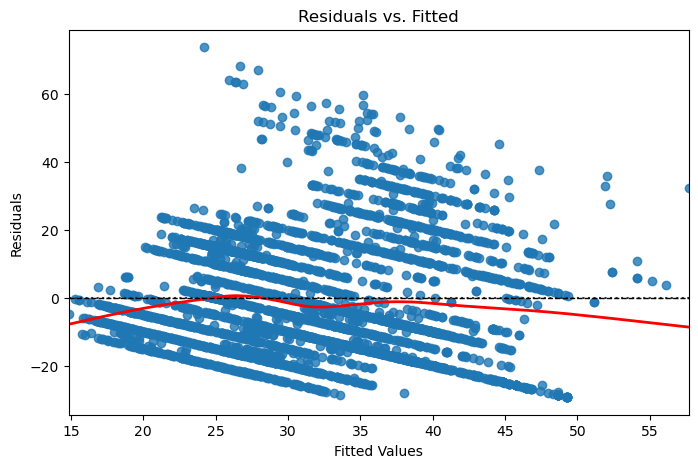

In [304]:
fitted_vals = backwards_bic_model.fittedvalues
backwards_residuals = backwards_bic_model.resid

plt.figure(figsize=(8,5))
sns.residplot(x=fitted_vals, y=backwards_residuals, lowess=True, line_kws={"color": "red", "lw": 2})
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted")
plt.show()


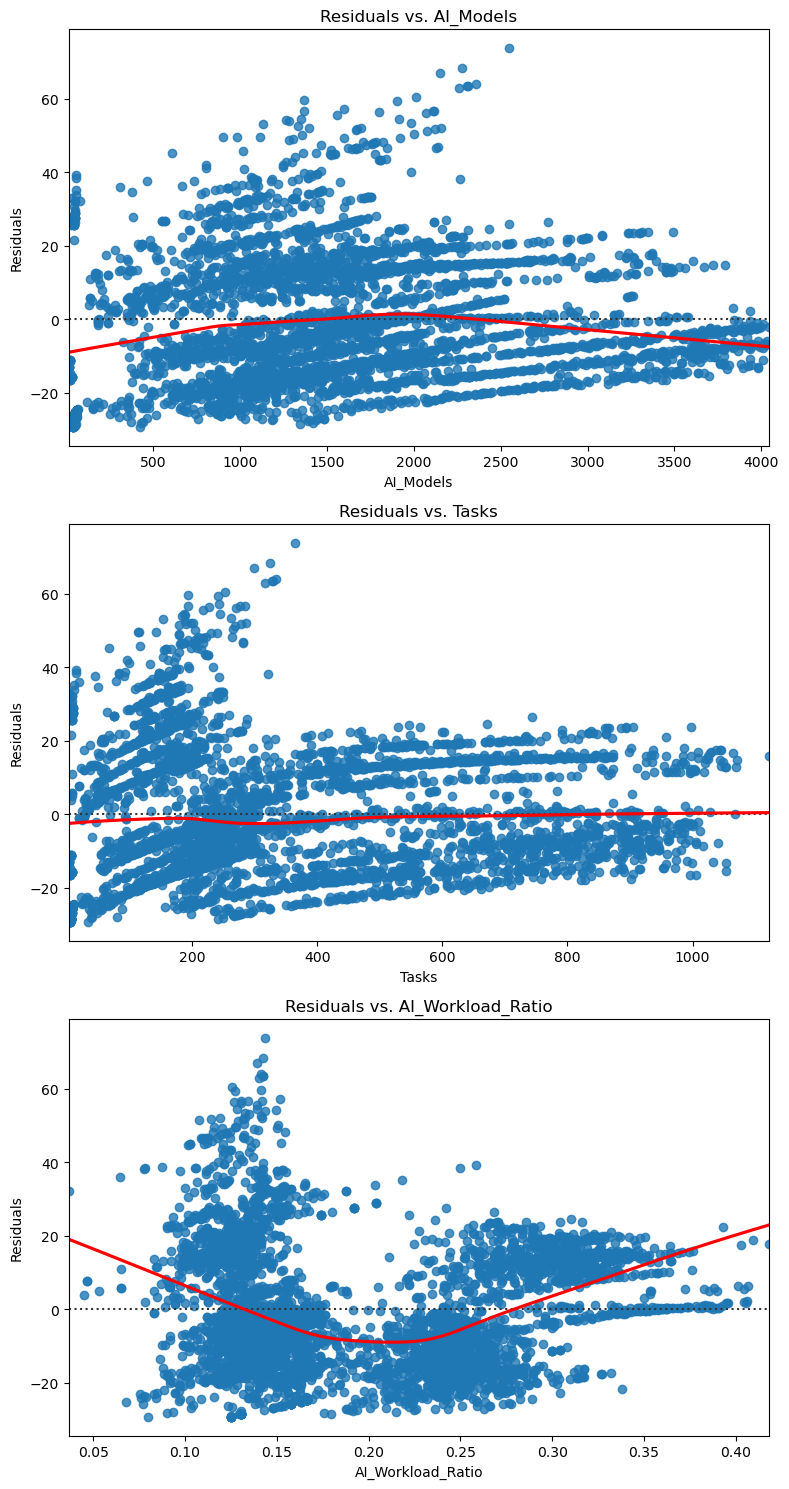

In [305]:
predictors = backward_bic_vars

fig, axes = plt.subplots(nrows=len(predictors), figsize=(8, 5 * len(predictors)))

for i, predictor in enumerate(predictors):
    sns.residplot(x=AI_Job_Threat_Index[predictor], y=backwards_bic_model.resid, lowess=True, line_kws={'color': 'red'}, ax=axes[i])
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel("Residuals")
    axes[i].set_title(f"Residuals vs. {predictor}")

plt.tight_layout()
plt.show()


To ensure our regression model satisfies the linearity assumption, we used residuals vs. fitted plots and residuals vs. individual covariates plots. These plots help us check whether the relationship between our covariates and the dependent variable, `AI_Impact_Percent` is correctly modeled as linear. Ideally, residuals should be randomly scattered around zero without a discernible pattern, indicating that a linear model appropriately captures relationships in the data. However, in our case, the residuals exhibit strong curved trends, particularly in the residuals vs. fitted plot and against `AI_Workload_Ratio`, suggesting that the relationship between predictors and AI impact is non-linear. The red lowess lines further emphasize these non-linear patterns, deviating significantly from the zero-residual horizontal line. This implies that a simple linear model may not fully capture how AI models, task complexity, and workload ratio interact to determine AI impact. This violation suggest that transformations, polynomial terms, or non-linear regression methods may be needed to better fit the data.

As for homoscedasticity, which assumes that the variance remains constant, our residual plots show strong evidence of heteroscedasticity. the residuals become more spread out at higher fitted values, indicating that the variance of errors increases as AI impact rises. This pattern suggests that our model struggles to maintain consistent predictive accuracy across all levels of AI impact, potentially underestimating variance in lower ranges and overestimating it in higher ranges. The residuals vs. `AI_Models` and `Tasks` plots also show a fanning effect, reinforcing the issue of non-constant variance. We might have to consider log transformations.

#### Independence

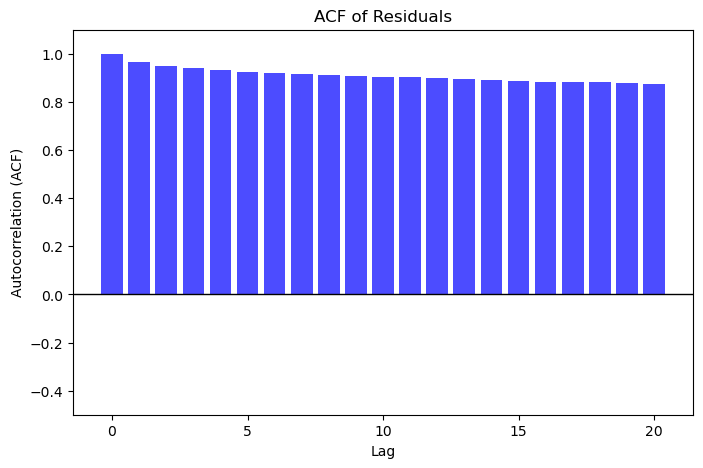

In [306]:
lags = 20
acf_values = acf(backwards_bic_model.resid, nlags=lags)

plt.figure(figsize=(8,5))
plt.bar(range(lags+1), acf_values, color="blue", alpha=0.7)
plt.axhline(y=0, color='black', linewidth=1)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation (ACF)")
plt.title("ACF of Residuals")
plt.ylim(-0.5, 1.1)

plt.show()


We can test independence by looking at the ACF (autocorrelation factor) plot of residuals. In this plot, it seems to suggest a strong presence of autocorrelation in the model's residuals. Ideally, if residuals were independent, we would expect most bars to be close to zero after lag 0, but instead, the residuals remain highly correlated across multiple lags. This violates the assumption of independence. The pattern indicates that there may be systematic trends or dependencies in the data that the model is failing to capture. A linear model might not be appropriate.

#### Normality

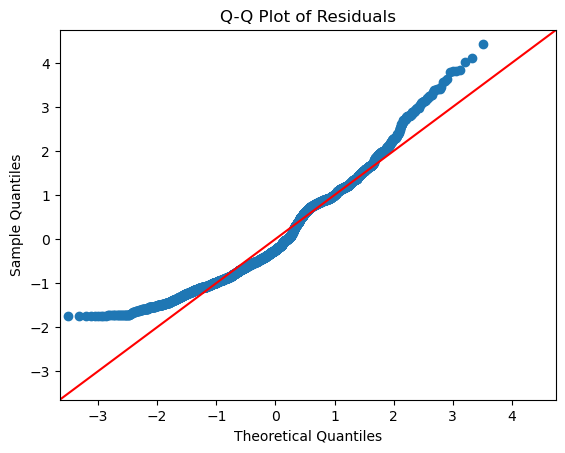

Shapiro-Wilk Test p-value: 0.0


In [310]:
sm.qqplot(backwards_residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

shapiro_test = stats.shapiro(backwards_residuals)
print(f"Shapiro-Wilk Test p-value: {round(shapiro_test.pvalue, 5)}")


To see if the data is normally distributed, we can plot a Q-Q plot of residuals. As you can see by the plot and the Shapiro-Wilk test p-value of 0.0, it shows a violation of normality. The middle quantiles somewhat follow the expected normal distribution, but the deviations in both tails suggest the presence of heavy-tailed behavior and potential skewness. A p-value of 0.0 in the Shapiro-Wilk test formally rejects the null hypothesis of normality, informally stating that these residuals do not follow a normal distribution. Given this, our OLS model might not be reliable.

#### Multicollinearity of Features

In [338]:
exog = backwards_bic_model.model.exog
names = backwards_bic_model.model.exog_names

for i in range(1, exog.shape[1]):
    print(f'VIF: {names[i]}: {variance_inflation_factor(exog, i): .3f}')

VIF: AI_Models:  17.394
VIF: Tasks:  30.521
VIF: AI_Workload_Ratio:  7.184


The VIF values indicate strong multicollinearity, particularly for Tasks (30.521) and AI_Models (17.394). All of these covariates are highly correlated, making coefficient estimates unstable. To address this, we may need to remove or combine correlated features (itneraction terms), apply dimensionality reduction (e.g., PCA), or switch to a model more suited for nonlinear relationships.

### Overall Interpretation of Linear Assumptions

The data and our OLS model violates all of the linear assumptions. Although we could've perform log-transformations and interaction terms, a nonlinear model might be more appropriate for capturing the complex nonlinear relationships in the data, given that we failed all of these violations. As such, we also learned SVR in this class, which is a type of Support Vector Machine for Regression and can represent these nonlinear relationships a bit clearer.

### Support Vector Regression (AI Job Threat Index)
We will be predicting AI Impact based on the covariates selected by Backward Selection + BIC using Support Vector Regression, the same way done in lecture (week 9).

#### Running Support Vector Regression (SVR) using hyperparameters `n_components=0.95`, `C=1e4`, `epsilon=1.0`
**Note**: We also log transformed our covariates to avoid heteroscedasticity and used PCA for dimensionality reduction to maintain a stable variance.

In [377]:
# train-test split
X = AI_Job_Threat_Index[list(backward_bic_vars)]
y = AI_Job_Threat_Index['AI_Impact_Percent']

X_train, X_cal, y_train, y_cal = train_test_split(X, y, test_size=0.25, random_state=42)

# log transformation on covariates to avoid heteroscedasticity
X_train_log = np.log1p(X_train)
X_cal_log = np.log1p(X_cal)


# PCA pipeline with SVR --> PCA for dimensionality reduction
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('svr', SVR(C=1e4, epsilon=1.0))
])

# train SVR Model (using PCA)
pca_pipeline.fit(X_train_log, y_train)

# evaluate the model
yhat = pca_pipeline.predict(X_cal_log)

# compute errors & performance metrics
mse = mean_squared_error(y_cal, yhat)
r2 = r2_score(y_cal, yhat)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R^2): {r2:.4f}")

# compute conformity scores (prediction interval)
errors = y_cal - yhat
conf_score = np.sort(errors)

# compute prediction interval (90% confidence)
alpha = 0.1  
lower = conf_score[int(alpha/2 * len(conf_score))]
upper = conf_score[int((1 - alpha/2) * len(conf_score))]

# compute prediction interval coverage
pred_upper = yhat + upper
pred_lower = yhat + lower

coverage = np.mean((y_cal >= pred_lower) & (y_cal <= pred_upper))
print(f"Prediction Interval Coverage: {coverage:.2%}")


Mean Squared Error (MSE): 242.4708
R-squared (R^2): 0.3091
Prediction Interval Coverage: 90.05%


#### Hyperparameter Tuning

In [381]:
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('svr', SVR())
])

param_grid = {
    'pca__n_components': [0.80, 0.85, 0.90, 0.95],
    'svr__C': [1e2, 1e3, 1e4],
    'svr__epsilon': [1.0, 2.0, 2.5, 3.0],
}

grid_search = GridSearchCV(pca_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_log, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

best_model = grid_search.best_estimator_
yhat_best = best_model.predict(X_cal_log)

mse_best = mean_squared_error(y_cal, yhat_best)
r2_best = r2_score(y_cal, yhat_best)

print(f"Tuned Mean Squared Error (MSE): {mse_best:.4f}")
print(f"Tuned R-squared (R^2): {r2_best:.4f}")

errors = y_cal - yhat_best
conf_score = np.sort(errors)
alpha = 0.1  
lower = conf_score[int(alpha/2 * len(conf_score))]
upper = conf_score[int((1 - alpha/2) * len(conf_score))]
pred_upper = yhat + upper
pred_lower = yhat + lower
coverage = np.mean((y_cal >= pred_lower) & (y_cal <= pred_upper))
print(f"Prediction Interval Coverage: {coverage:.2%}")

Best Parameters: {'pca__n_components': 0.8, 'svr__C': 1000.0, 'svr__epsilon': 3.0}
Tuned Mean Squared Error (MSE): 240.0534
Tuned R-squared (R^2): 0.3160
Prediction Interval Coverage: 90.32%


### Process and Findings from SVR model

As noted earlier, our OLS model had many issues with linear assumptions (as many of them were violated). Granted that the dataset we're working with does not entirely assume linear relationships after investigating linear assumptions and multicollinearity, we decided to do SVR using the same covariates calculated by backward selection and AIC/BIC (which garnered the same subset of covariates). SVR does not assume linearity, allowing it to model complex, nonlinear relationships between features and AI Impact, and it is also robust to multicollinearity. 

Granted, however, the raw data in our dataset presented additional challenges; our covariate distributions were highly skewed. Since our covariates `AI_Models`, `Tasks`, and `AI_Workload_Ratio` were right-skewed distributions, we applied a log transformation to stabilize variance and mitigate heteroscedasticity present in our data. This ensures that covariate effects are more proportional and thus preventing extreme values from disproportionately influencing the model.

Despite SVR’s flexibility, high-dimensional data with correlated features can still introduce redundancy and therefore increase model complexity. In combating this, we used Principal Component Analysis (PCA) to reduce dimensionality while retaining the most important variance. This step also improved SVR’s efficiency, ensuring that it learned from uncorrelated and necessary features rather than redundant ones. We also hyperparameter tuned PCA's number of components, the C variable, and epsilon to find a balance between the flexibility of the model and error tolerance to ensure SVR could generalize well without over or underfitting.

As AI adoption accelerates across industries, understanding its impact on jobs is more critical than ever. Our SVR model, optimized with PCA and hyperparameter tuning, provides a structured approach to predicting AI Impact Percent while accounting for the complex, nonlinear relationships present in our data. With an R^2 of 0.316, the model explains 31.6% of the variance in AI’s job impact, practically doubling the explanatory power of our OLS model, which struggled with linearity assumptions and multicollinearity. While AI’s influence on the workforce extends beyond the covariates used (`AI_Models`, `Tasks`, and `AI_Workload_Ratio`), these covariates still capture some of the main causes of AI's impact on jobs. That is, `AI_Models` reflects the scale of AI deployment in a workplace, signaling automation’s potential to replace or enhance human labor. `Tasks` measures job complexity, helping identify roles most susceptible to automation, while `AI_Workload_Ratio` quantifies AI’s actual integration into daily work. These covariates allow us to move beyond a simplistic view of AI disruption and have some sort of quantification as to how different industries may be impacted by the use of AI in their workplace. While unobserved factors not present in the dataset likely play a role, our model provides a data-driven foundation for understanding which sectors and roles are most vulnerable to automation and/or which may experience enhancement rather than displacement.

The MSE of 240.05 suggests that, while the model is effective, some level of prediction error is expected, given that the covariates are AI-related and AI’s evolving nature. It is also important to note that unobserved covariates not included in the dataset could further explain AI’s impact, potentially improving predictive accuracy. More importantly, the 90.32% prediction interval coverage means that the model’s confidence intervals successfully account for the vast majority of actual AI Impact values, making it a practical tool for forecasting workforce trends despite the inherent uncertainties of AI and its potential causes. As AI continues reshaping industries, this model acts as a data-backed framework for decision-makers, such as policymakers designing job transition programs, businesses assessing automation risks, or workers preparing for shifts in labor demand. While no model can fully capture AI’s evolving impact, this one provides a good, grounded starting point for understanding what kind of sectors and its aspects of work are most vulnerable (use of AI in the workplace, number of tasks, how often AI is used at work, etc.), reinforcing the growing need for strategies to adapt to the shifting workforce trends during this AI boom.